<a href="https://colab.research.google.com/github/waadalhoshan/ZSL4REQ/blob/main/StatAnalysis_ZSL4RE_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview: Statistical Analysis of ZSL classifiers' performance across Tasks

A SciPy python package is used to apply the statistical significant analysis for all the ZSL classification tasks. The tasks and the their associated tasks are summerized below:

*   **FR:** results from ZSL classifiers to measure the similarity relatedness between labels and requirements; the total of ZSL classifiers under this task is: **24** ZSL models (4 different language models) * 6 label configurations)
*   **NFR:** results obtained in BOTH the binary-class and multi-class classification tasks for top NFR class (we considered top-4 NFR classes: Usability (US), Security (SE), Operational (O), and Performance (PE)). For each NFR binary classification task, we have 4 language models * 5 label configurations. We have **20** ZSL models for each NFR class (i.e., an overall of **100** ZSL models for the top-4 NFR classes). For multi-class classification, we have: 4 language models * 4 labels configurations, a total of 16 ZSL models for N multi-class classification.
* **Sec**: results obtained by the ZSL binary classifiers for the security class, for entire SeqReq datatset, and in this task we have: 4 language models * 4 label configurations, and in total we have **16** ZSL models to binary classify security requirements.

The statistical analysis is conducted to test if the results, obtained by these ZSL classifiers, are significant from twofold:


*   the impact of language models variation with a specefic label configuartion (the impact of LMs) and;
*   the effect of different label configurations in a specific language model (the impact of label configurations). 

The null hypothesis ($H_{0}$) is that all the classifiers have the same performance means which means they are not statically significant, and any significant results could be due to chance; and the alternative hypothesis ($H_{1}$), is the opposite of that.

*In this colab notebook, we demonstrate the statistical analysis (with the results) used to study the ZSL classifiers' performance.*



---




In [1]:
import math
import numpy as np
import pandas as pd
#from scipy.stats import kstest
#from scipy.stats import lognorm
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import statistics
#from sklearn.decomposition import PCA
from google.colab import data_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# FR Task (binary-class classification): Statistcal Analysis

In [2]:

#The dataset can downloaded from https://github.com/tobhey/NoRBERT  
url='https://drive.google.com/file/d/16xo50SVglrXPAeXbLQ2UbJRgB2U1O2Xz/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
FR_data = pd.read_csv(dwn_url, delimiter=',')
data_table.DataTable(FR_data, include_index=False, num_rows_per_page=10)

## A) Results Description 

In [3]:
cols = ['LM1_A' , 'LM1_B', 'LM1_C', 'LM1_D', 'LM1_E', 'LM1_F',
        'LM2_A' , 'LM2_B', 'LM2_C', 'LM2_D', 'LM2_E', 'LM2_F',
        'LM3_A' , 'LM3_B', 'LM3_C', 'LM3_D', 'LM3_E', 'LM3_F',
        'LM4_A' , 'LM4_B', 'LM4_C', 'LM4_D', 'LM4_E', 'LM4_F'
        ]
FR_data.describe()

Unnamed: 0       LM1_A       LM2_A       LM3_A       LM4_A       LM1_B  \
count  625.000000  625.000000  625.000000  625.000000  625.000000  625.000000   
mean   312.000000    0.234794    0.095168    0.391461    0.842444    0.286509   
std    180.566239    0.110788    0.053909    0.060005    0.017664    0.111221   
min      0.000000   -0.043438   -0.056973    0.239857    0.793154   -0.073517   
25%    156.000000    0.153838    0.055106    0.351607    0.830786    0.217734   
50%    312.000000    0.236672    0.094559    0.384681    0.840117    0.291733   
75%    468.000000    0.309587    0.130399    0.424275    0.855071    0.363911   
max    624.000000    0.624866    0.286989    0.606140    0.891509    0.553045   

            LM2_B       LM3_B       LM4_B       LM1_C  ...       LM3_D  \
count  625.000000  625.000000  625.000000  625.000000  ...  625.000000   
mean     0.143324    0.590495    0.921773    0.289210  ...    0.671040   
std      0.072395    0.067206    0.016581    0.116187  ...    0.096386   
min     -0.038796    0.380571    0.861050   -0.103129  ...    0.404720   
25%      0.089870    0.548825    0.913059    0.214452  ...    0.607987   
50%      0.140703    0.601116    0.925486    0.296270  ...    0.661021   
75%      0.187567    0.641813    0.933992    0.370143  ...    0.732405   
max      0.433329    0.730139    0.951750    0.583160  ...    0.918296   

            LM4_D       LM1_E       LM2_E       LM3_E       LM4_E       LM1_F  \
count  625.000000  625.000000  625.000000  625.000000  625.000000  625.000000   
mean     0.913077    0.339827    0.251400    0.731944    0.935708    0.332215   
std      0.016161    0.114175    0.103018    0.095658    0.012894    0.117058   
min      0.872830   -0.028867    0.015972    0.471356    0.877307   -0.061791   
25%      0.900615    0.269456    0.174238    0.653514    0.927424    0.260693   
50%      0.916532    0.347808    0.243506    0.737033    0.935804    0.338990   
75%      0.925896    0.418655    0.325468    0.794869    0.946662    0.409082   
max      0.942445    0.626574    0.583882    0.942028    0.961145    0.626574   

            LM2_F       LM3_F       LM4_F  
count  625.000000  625.000000  625.000000  
mean     0.214832    0.734494    0.929737  
std      0.073636    0.067284    0.009881  
min      0.013785    0.498162    0.877307  
25%      0.166889    0.688704    0.925140  
50%      0.211127    0.740795    0.931107  
75%      0.260161    0.787771    0.936495  
max      0.451022    0.865161    0.949383  

[8 rows x 25 columns]

## B) Normality Testing

For normality testing, we run two test: 


*   **numerical test:** using Shapiro-Wilk test which tests the null hypothesis that the data was drawn from a normal distribution; and 
*   **visual test:** using a quantile-quantile plot (Q-Q plot) of the standardized data against the standard normal distribution to check the alignment of the data distribution against its standard normal distribution

###Observations:
In all the Q-Q plotting, the data values clearly **do not follow the red 45-degree line**, which is an indication that they **do not follow a normal distribution**. To confirm the results, we run Shapiro-Wilk test, we observed all the ZSl models (except 4 ZSL models) have non-normal data distribution. It should be noted that Shapiro-Wilk test is not accurate with data samples of more than 200, in our case the data sample size is 625. Therefore, we statistically concluded that all the ZSL model results came from a non-normal distribution. 

LM1_A


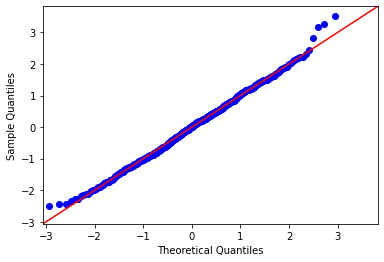

ZSL model :  LM1_A  Shapiro-Wilk test pvalue:  0.21440641582012177 ***normally distributed***
----------------------------------------
LM1_B


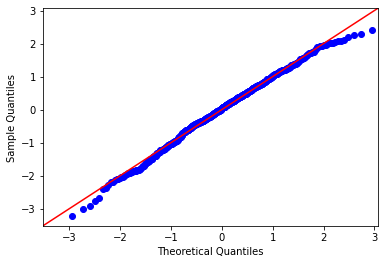

ZSL model :  LM1_B  Shapiro-Wilk test pvalue:  0.016863279044628143 
----------------------------------------
LM1_C


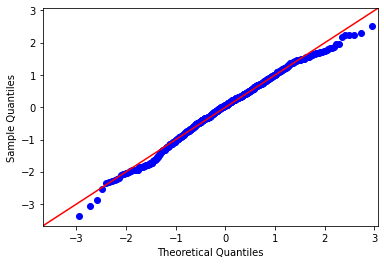

ZSL model :  LM1_C  Shapiro-Wilk test pvalue:  0.0019795619882643223 
----------------------------------------
LM1_D


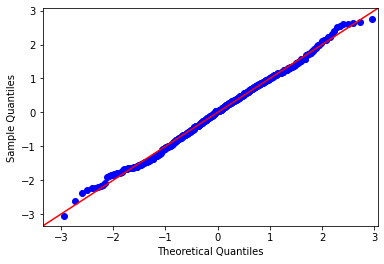

ZSL model :  LM1_D  Shapiro-Wilk test pvalue:  0.14363181591033936 ***normally distributed***
----------------------------------------
LM1_E


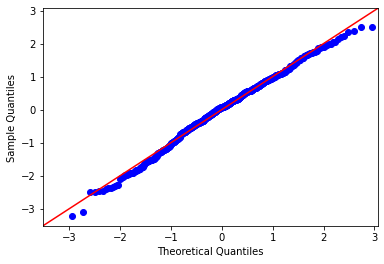

ZSL model :  LM1_E  Shapiro-Wilk test pvalue:  0.010667967610061169 
----------------------------------------
LM1_F


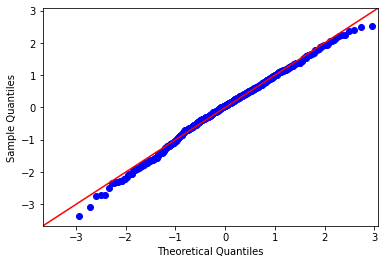

ZSL model :  LM1_F  Shapiro-Wilk test pvalue:  0.010947827249765396 
----------------------------------------
LM2_A


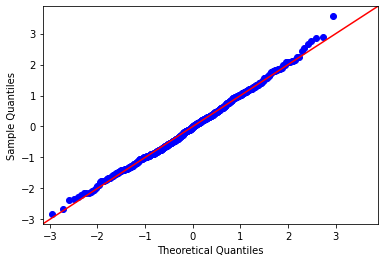

ZSL model :  LM2_A  Shapiro-Wilk test pvalue:  0.2810737192630768 ***normally distributed***
----------------------------------------
LM2_B


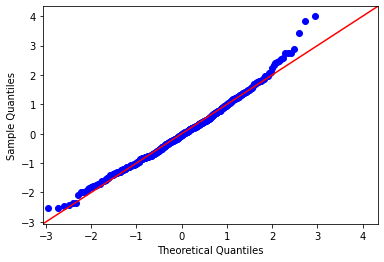

ZSL model :  LM2_B  Shapiro-Wilk test pvalue:  0.00020731074619106948 
----------------------------------------
LM2_C


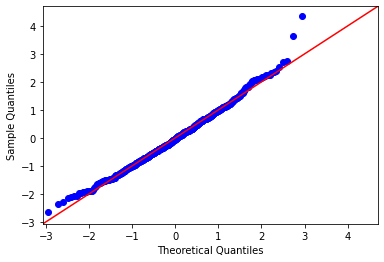

ZSL model :  LM2_C  Shapiro-Wilk test pvalue:  0.0020479520317167044 
----------------------------------------
LM2_D


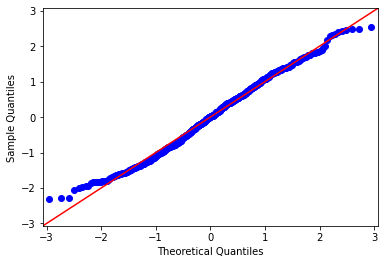

ZSL model :  LM2_D  Shapiro-Wilk test pvalue:  0.0003536948061082512 
----------------------------------------
LM2_E


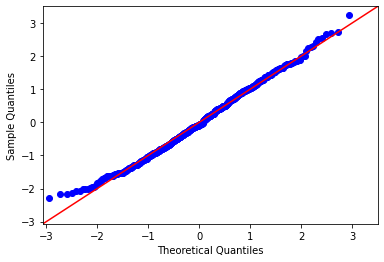

ZSL model :  LM2_E  Shapiro-Wilk test pvalue:  0.005821439437568188 
----------------------------------------
LM2_F


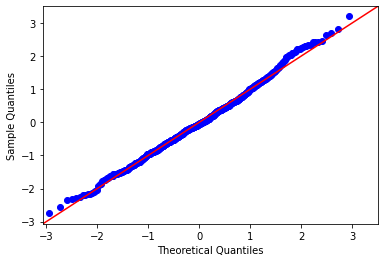

ZSL model :  LM2_F  Shapiro-Wilk test pvalue:  0.04320454224944115 
----------------------------------------
LM3_A


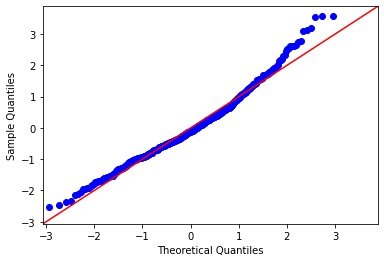

ZSL model :  LM3_A  Shapiro-Wilk test pvalue:  4.5016648186901875e-08 
----------------------------------------
LM3_B


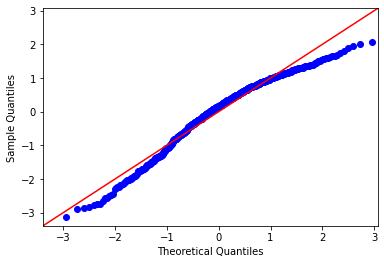

ZSL model :  LM3_B  Shapiro-Wilk test pvalue:  2.0795757477154453e-11 
----------------------------------------
LM3_C


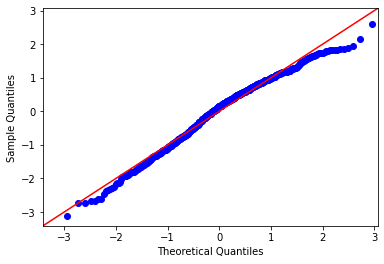

ZSL model :  LM3_C  Shapiro-Wilk test pvalue:  1.9714168502105167e-06 
----------------------------------------
LM3_D


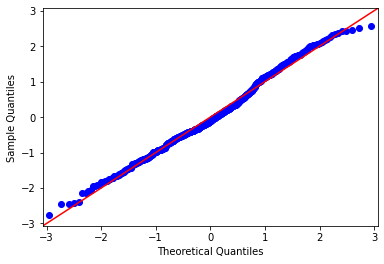

ZSL model :  LM3_D  Shapiro-Wilk test pvalue:  0.0007811886025592685 
----------------------------------------
LM3_E


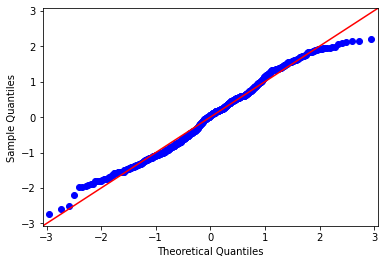

ZSL model :  LM3_E  Shapiro-Wilk test pvalue:  1.185176006401889e-05 
----------------------------------------
LM3_F


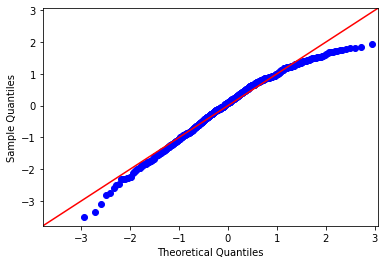

ZSL model :  LM3_F  Shapiro-Wilk test pvalue:  3.3457361325872625e-08 
----------------------------------------
LM4_A


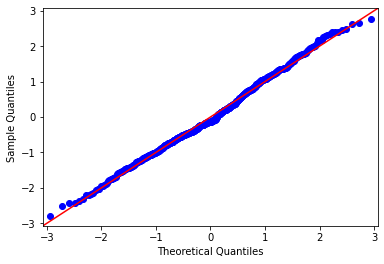

ZSL model :  LM4_A  Shapiro-Wilk test pvalue:  0.01703639142215252 
----------------------------------------
LM4_B


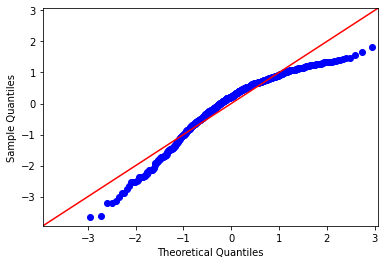

ZSL model :  LM4_B  Shapiro-Wilk test pvalue:  8.114821803646493e-17 
----------------------------------------
LM4_C


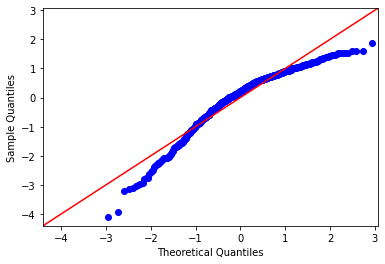

ZSL model :  LM4_C  Shapiro-Wilk test pvalue:  1.1239787073396684e-16 
----------------------------------------
LM4_D


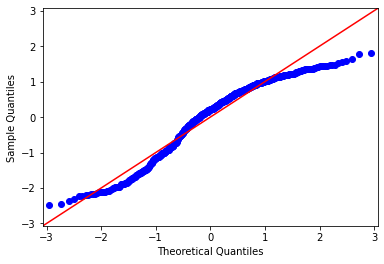

ZSL model :  LM4_D  Shapiro-Wilk test pvalue:  1.6496261415243144e-14 
----------------------------------------
LM4_E


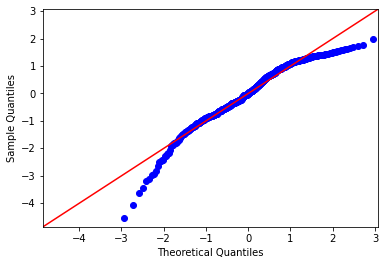

ZSL model :  LM4_E  Shapiro-Wilk test pvalue:  9.120170764431723e-12 
----------------------------------------
LM4_F


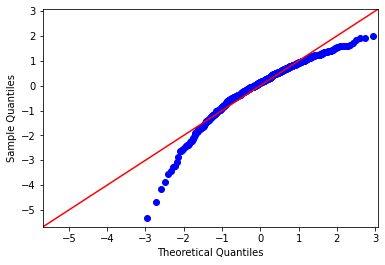

ZSL model :  LM4_F  Shapiro-Wilk test pvalue:  4.810929029420508e-16 
----------------------------------------


'\nfor (cols, data) in FR_data.iteritems():\n  pvalue = stats.shapiro(data.values)[1]\n  print(\'Column Name : \', cols, \' pvalue: \',  pvalue,\n          "***normally distributed***" if pvalue >0.05 else "")\n'

In [4]:
for c in cols:
  print(c)
  fig = sm.qqplot(FR_data[c], fit=True, line='45')
  plt.show()
  pvalue = stats.shapiro(FR_data[c])[1]
  print('ZSL model : ', c, ' Shapiro-Wilk test pvalue: ',  pvalue, "***normally distributed***" if pvalue >0.05 else "")
  print("----------------------------------------")
'''
for (cols, data) in FR_data.iteritems():
  pvalue = stats.shapiro(data.values)[1]
  print('Column Name : ', cols, ' pvalue: ',  pvalue,
          "***normally distributed***" if pvalue >0.05 else "")
'''

## C) Variance Testing

The statistical significance test (also known as “variance analysis”) is used to compare the variance of the means within the ZSL classifiers to assess if the systems have the same effect or not.

For this statistical test, we used *one-way ANOVA* with repeated measures, and verified the results with another nonparametric significance test, the *Friedman Test*.

### Observation:
We ran the variance testing to test the null hypotheses of a) language models' impact; and 2) label configurations. From all the variance testing results, all the ZSL classifiers in FR binary classification are **statistically significant** (i.e., we reject $H_{0}$ with a p-value less than 0.05). Therefore, the ZSL performance results are not due to chance.

In [6]:
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_A']), np.array(FR_data['LM2_A']), np.array(FR_data['LM3_A']), np.array(FR_data['LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_B']), np.array(FR_data['LM2_B']), np.array(FR_data['LM3_B']), np.array(FR_data['LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_C']), np.array(FR_data['LM2_C']), np.array(FR_data['LM3_C']), np.array(FR_data['LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_D']), np.array(FR_data['LM2_D']), np.array(FR_data['LM3_D']), np.array(FR_data['LM4_D'])))
print("Label-E across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_E']), np.array(FR_data['LM2_E']), np.array(FR_data['LM3_E']), np.array(FR_data['LM4_E'])))
print("Label-F across LMs ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_F']), np.array(FR_data['LM2_F']), np.array(FR_data['LM3_F']), np.array(FR_data['LM4_F'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_A']), np.array(FR_data['LM2_A']), np.array(FR_data['LM3_A']), np.array(FR_data['LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_B']), np.array(FR_data['LM2_B']), np.array(FR_data['LM3_B']), np.array(FR_data['LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_C']), np.array(FR_data['LM2_C']), np.array(FR_data['LM3_C']), np.array(FR_data['LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_D']), np.array(FR_data['LM2_D']), np.array(FR_data['LM3_D']), np.array(FR_data['LM4_D'])))
print("Label-E across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_E']), np.array(FR_data['LM2_E']), np.array(FR_data['LM3_E']), np.array(FR_data['LM4_E'])))
print("Label-F across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_F']), np.array(FR_data['LM2_F']), np.array(FR_data['LM3_F']), np.array(FR_data['LM4_F'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(FR_data['LM1_A']), np.array(FR_data['LM1_B']), np.array(FR_data['LM1_C']), np.array(FR_data['LM1_D']), np.array(FR_data['LM1_E']), np.array(FR_data['LM1_F'])))
print("LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(FR_data['LM2_A']), np.array(FR_data['LM2_B']), np.array(FR_data['LM2_C']), np.array(FR_data['LM2_D']), np.array(FR_data['LM2_E']), np.array(FR_data['LM2_F'])))
print("LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(FR_data['LM3_A']), np.array(FR_data['LM3_B']), np.array(FR_data['LM3_C']), np.array(FR_data['LM3_D']), np.array(FR_data['LM3_E']), np.array(FR_data['LM3_F'])))
print("LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(FR_data['LM4_A']), np.array(FR_data['LM4_B']), np.array(FR_data['LM4_C']), np.array(FR_data['LM4_D']), np.array(FR_data['LM4_E']), np.array(FR_data['LM4_F'])))
print("----------------------------------------")
print("LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(FR_data['LM1_A']), np.array(FR_data['LM1_B']), np.array(FR_data['LM1_C']), np.array(FR_data['LM1_D']), np.array(FR_data['LM1_E']), np.array(FR_data['LM1_F'])))
print("LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(FR_data['LM2_A']), np.array(FR_data['LM2_B']), np.array(FR_data['LM2_C']), np.array(FR_data['LM2_D']), np.array(FR_data['LM2_E']), np.array(FR_data['LM2_F'])))
print("LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(FR_data['LM3_A']), np.array(FR_data['LM3_B']), np.array(FR_data['LM3_C']), np.array(FR_data['LM3_D']), np.array(FR_data['LM3_E']), np.array(FR_data['LM3_F'])))
print("LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(FR_data['LM4_A']), np.array(FR_data['LM4_B']), np.array(FR_data['LM4_C']), np.array(FR_data['LM4_D']), np.array(FR_data['LM4_E']), np.array(FR_data['LM4_F'])))

Label-A across LMs ANOVA p-value: F_onewayResult(statistic=13779.993868494528, pvalue=0.0)
Label-B across LMs ANOVA p-value: F_onewayResult(statistic=13318.28113183274, pvalue=0.0)
Label-C across LMs ANOVA p-value: F_onewayResult(statistic=14261.066425363859, pvalue=0.0)
Label-D across LMs ANOVA p-value: F_onewayResult(statistic=7241.418545458137, pvalue=0.0)
Label-E across LMs ANOVA p-value: F_onewayResult(statistic=7946.273883595049, pvalue=0.0)
Label-F across LMs ANOVA p-value: F_onewayResult(statistic=11858.978233285328, pvalue=0.0)
----------------------------------------
Label-A across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1757.1273600000004, pvalue=0.0)
Label-B across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1799.163840000001, pvalue=0.0)
Label-C across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1807.9804800000002, pvalue=0.0)
Label-D across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1699.128000000000

# NFR Task (multi-class classification): Statistcal Analysis

In [7]:

#The dataset can downloaded from https://github.com/tobhey/NoRBERT  
url='https://drive.google.com/file/d/1FR_-fKJ0fxYEE1Or6WXW0Ph8tPerdOI5/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
NFRmulti_data = pd.read_csv(dwn_url, delimiter=',')
data_table.DataTable(NFRmulti_data, include_index=False, num_rows_per_page=10)

## A) Results Description 

In [8]:
cols = ['LM1_A' , 'LM1_B', 'LM1_C', 'LM1_D',
        'LM2_A' , 'LM2_B', 'LM2_C', 'LM2_D', 
        'LM3_A' , 'LM3_B', 'LM3_C', 'LM3_D', 
        'LM4_A' , 'LM4_B', 'LM4_C', 'LM4_D' 
        ]
NFRmulti_data.describe()

Unnamed: 0       LM1_A       LM2_A       LM3_A       LM4_A       LM1_B  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   124.000000    0.269040    0.193899    0.382163    0.787280    0.347365   
std     72.024301    0.111469    0.076217    0.040899    0.014256    0.127471   
min      0.000000    0.019776    0.004091    0.281909    0.754633    0.067761   
25%     62.000000    0.189895    0.138517    0.353826    0.778538    0.259897   
50%    124.000000    0.257778    0.185014    0.374252    0.785237    0.340328   
75%    186.000000    0.342496    0.238357    0.400177    0.794151    0.432975   
max    248.000000    0.639274    0.487061    0.549098    0.835168    0.822623   

            LM2_B       LM3_B       LM4_B       LM1_C       LM2_C       LM3_C  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean     0.272271    0.708347    0.926715    0.327929    0.214257    0.730555   
std      0.114177    0.080727    0.012506    0.132784    0.088045    0.084684   
min      0.042225    0.547188    0.869617   -0.025518    0.040032    0.499463   
25%      0.185976    0.648151    0.921565    0.244572    0.148529    0.668581   
50%      0.260882    0.687882    0.927994    0.334063    0.201038    0.740453   
75%      0.352771    0.772345    0.934044    0.426788    0.273872    0.800754   
max      0.572765    0.914036    0.954245    0.706011    0.534388    0.882590   

            LM4_C       LM1_D       LM2_D       LM3_D       LM4_D  
count  249.000000  249.000000  249.000000  249.000000  249.000000  
mean     0.933542    0.356259    0.242841    0.788414    0.941286  
std      0.011382    0.116069    0.130453    0.087164    0.008637  
min      0.881925    0.002840    0.074692    0.560961    0.910372  
25%      0.926373    0.287529    0.146253    0.721514    0.937208  
50%      0.934467    0.358115    0.197490    0.809530    0.943279  
75%      0.940743    0.435131    0.318482    0.859795    0.947611  
max      0.957575    0.710030    0.654618    0.917555    0.955445

## B) Normality Testing

For normality testing, we run two test: 


*   **numerical test:** using Shapiro-Wilk test which tests the null hypothesis that the data was drawn from a normal distribution; and 
*   **visual test:** using a quantile-quantile plot (Q-Q plot) of the standardized data against the standard normal distribution to check the alignment of the data distribution against its standard normal distribution

###Observations:
In all the Q-Q plotting, the data values clearly **do not follow the red 45-degree line**, which is an indication that they **do not follow a normal distribution**. To confirm the results, we run Shapiro-Wilk test, we observed all the ZSl models have non-normal data distribution. Therefore, we statistically concluded that all the ZSL model results came from a non-normal distribution. 

LM1_A


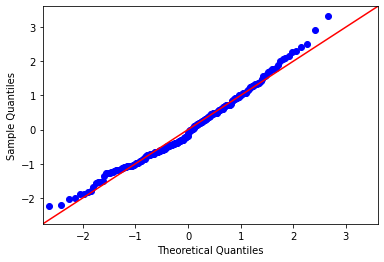

ZSL model :  LM1_A  Shapiro-Wilk test pvalue:  0.009908018633723259 
----------------------------------------
LM1_B


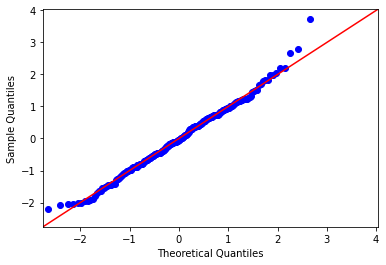

ZSL model :  LM1_B  Shapiro-Wilk test pvalue:  0.1457071453332901 ***normally distributed***
----------------------------------------
LM1_C


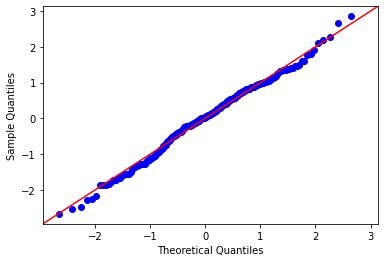

ZSL model :  LM1_C  Shapiro-Wilk test pvalue:  0.22698527574539185 ***normally distributed***
----------------------------------------
LM1_D


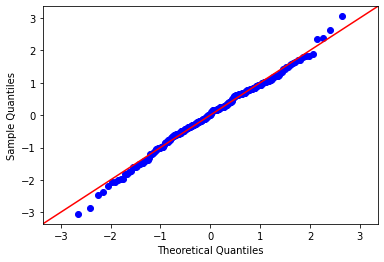

ZSL model :  LM1_D  Shapiro-Wilk test pvalue:  0.5079455375671387 ***normally distributed***
----------------------------------------
LM2_A


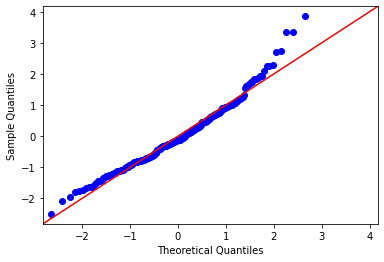

ZSL model :  LM2_A  Shapiro-Wilk test pvalue:  6.066070272936486e-05 
----------------------------------------
LM2_B


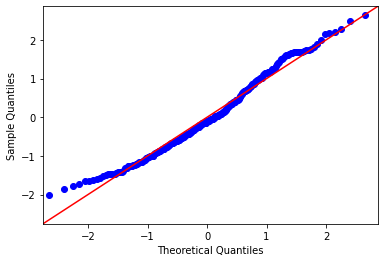

ZSL model :  LM2_B  Shapiro-Wilk test pvalue:  0.0006716210627928376 
----------------------------------------
LM2_C


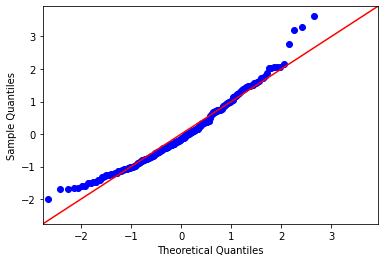

ZSL model :  LM2_C  Shapiro-Wilk test pvalue:  1.2610125850187615e-05 
----------------------------------------
LM2_D


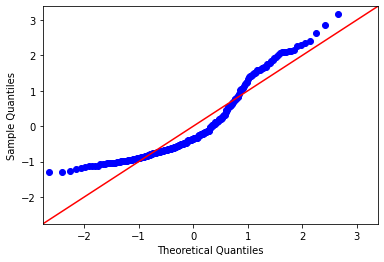

ZSL model :  LM2_D  Shapiro-Wilk test pvalue:  4.658430759196808e-13 
----------------------------------------
LM3_A


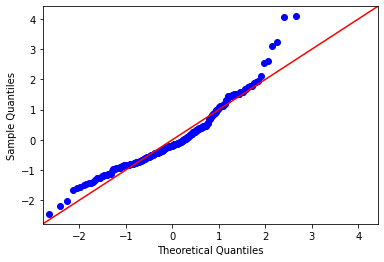

ZSL model :  LM3_A  Shapiro-Wilk test pvalue:  2.0171393444456953e-08 
----------------------------------------
LM3_B


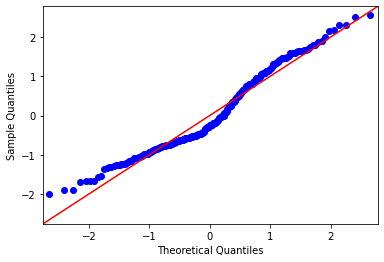

ZSL model :  LM3_B  Shapiro-Wilk test pvalue:  9.45515694183996e-07 
----------------------------------------
LM3_C


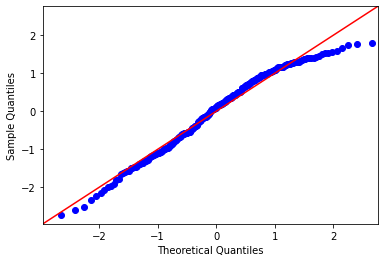

ZSL model :  LM3_C  Shapiro-Wilk test pvalue:  0.00015748050645925105 
----------------------------------------
LM3_D


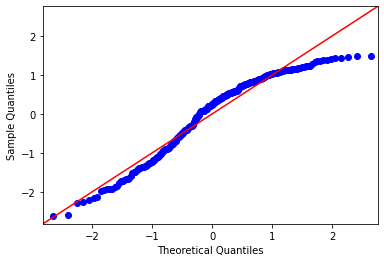

ZSL model :  LM3_D  Shapiro-Wilk test pvalue:  1.4425171279697224e-08 
----------------------------------------
LM4_A


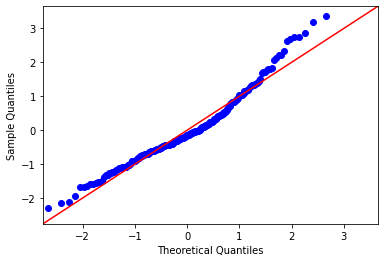

ZSL model :  LM4_A  Shapiro-Wilk test pvalue:  3.1785727969690925e-06 
----------------------------------------
LM4_B


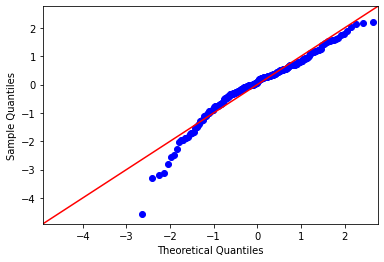

ZSL model :  LM4_B  Shapiro-Wilk test pvalue:  1.7893619030928676e-07 
----------------------------------------
LM4_C


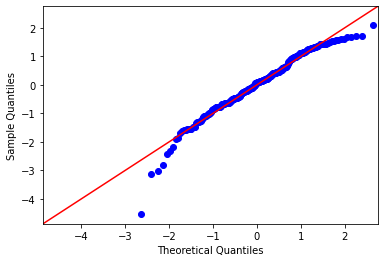

ZSL model :  LM4_C  Shapiro-Wilk test pvalue:  3.611931606428698e-05 
----------------------------------------
LM4_D


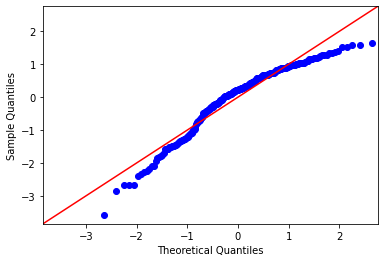

ZSL model :  LM4_D  Shapiro-Wilk test pvalue:  4.258946528779006e-09 
----------------------------------------


In [9]:
for c in cols:
  print(c)
  fig = sm.qqplot(NFRmulti_data[c], fit = True, line='45')
  plt.show()
  pvalue = stats.shapiro(NFRmulti_data[c])[1]
  print('ZSL model : ', c, ' Shapiro-Wilk test pvalue: ',  pvalue, "***normally distributed***" if pvalue >0.05 else "")
  print("----------------------------------------")


## C) Variance Testing

The statistical significance test (also known as “variance analysis”) is used to compare the variance of the means within the ZSL classifiers to assess if the systems have the same effect or not.

For this statistical test, we used *one-way ANOVA* with repeated measures, and verified the results with another nonparametric significance test, the *Friedman Test*.

### Observation:
We ran the variance testing to test the null hypotheses of a) language models' impact; and 2) label configurations. From all the variance testing results, **all the ZSL classifiers in NFR multi-class classification are statistically significant** (i.e., we reject $h_{0}$ with a p-value less than 0.05). Therefore, the ZSL performance results are not due to chance.

In [10]:
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRmulti_data['LM1_A']), np.array(NFRmulti_data['LM2_A']), np.array(NFRmulti_data['LM3_A']), np.array(NFRmulti_data['LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRmulti_data['LM1_B']), np.array(NFRmulti_data['LM2_B']), np.array(NFRmulti_data['LM3_B']), np.array(NFRmulti_data['LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRmulti_data['LM1_C']), np.array(NFRmulti_data['LM2_C']), np.array(NFRmulti_data['LM3_C']), np.array(NFRmulti_data['LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRmulti_data['LM1_D']), np.array(NFRmulti_data['LM2_D']), np.array(NFRmulti_data['LM3_D']), np.array(NFRmulti_data['LM4_D'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRmulti_data['LM1_A']), np.array(NFRmulti_data['LM2_A']), np.array(NFRmulti_data['LM3_A']), np.array(NFRmulti_data['LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRmulti_data['LM1_B']), np.array(NFRmulti_data['LM2_B']), np.array(NFRmulti_data['LM3_B']), np.array(NFRmulti_data['LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRmulti_data['LM1_C']), np.array(NFRmulti_data['LM2_C']), np.array(NFRmulti_data['LM3_C']), np.array(NFRmulti_data['LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRmulti_data['LM1_D']), np.array(NFRmulti_data['LM2_D']), np.array(NFRmulti_data['LM3_D']), np.array(NFRmulti_data['LM4_D'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(NFRmulti_data['LM1_A']), np.array(NFRmulti_data['LM1_B']), np.array(NFRmulti_data['LM1_C']), np.array(NFRmulti_data['LM1_D'])))
print("LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRmulti_data['LM2_A']), np.array(NFRmulti_data['LM2_B']), np.array(NFRmulti_data['LM2_C']), np.array(NFRmulti_data['LM2_D'])))
print("LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRmulti_data['LM3_A']), np.array(NFRmulti_data['LM3_B']), np.array(NFRmulti_data['LM3_C']), np.array(NFRmulti_data['LM3_D'])))
print("LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRmulti_data['LM4_A']), np.array(NFRmulti_data['LM4_B']), np.array(NFRmulti_data['LM4_C']), np.array(NFRmulti_data['LM4_D'])))
print("----------------------------------------")
print("LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRmulti_data['LM1_A']), np.array(NFRmulti_data['LM1_B']), np.array(NFRmulti_data['LM1_C']), np.array(NFRmulti_data['LM1_D'])))
print("LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRmulti_data['LM2_A']), np.array(NFRmulti_data['LM2_B']), np.array(NFRmulti_data['LM2_C']), np.array(NFRmulti_data['LM2_D'])))
print("LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRmulti_data['LM3_A']), np.array(NFRmulti_data['LM3_B']), np.array(NFRmulti_data['LM3_C']), np.array(NFRmulti_data['LM3_D'])))
print("LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRmulti_data['LM4_A']), np.array(NFRmulti_data['LM4_B']), np.array(NFRmulti_data['LM4_C']), np.array(NFRmulti_data['LM4_D'])))

Label-A across LMs ANOVA p-value: F_onewayResult(statistic=3461.4160690418844, pvalue=0.0)
Label-B across LMs ANOVA p-value: F_onewayResult(statistic=2626.1247936290442, pvalue=0.0)
Label-C across LMs ANOVA p-value: F_onewayResult(statistic=3471.246474723208, pvalue=0.0)
Label-D across LMs ANOVA p-value: F_onewayResult(statistic=2937.725007931202, pvalue=0.0)
----------------------------------------
Label-A across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=642.142168674699, pvalue=7.362582579228055e-139)
Label-B across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=680.5228915662656, pvalue=3.510184140410252e-147)
Label-C across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=707.8240963855424, pvalue=4.2214863723700823e-153)
Label-D across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=696.9373493975909, pvalue=9.685815781090683e-151)
----------------------------------------
----------------------------------------
LM1 across 

# NFR Task (binary-class classification): Statistcal Analysis

In [12]:

#The dataset can downloaded from https://github.com/tobhey/NoRBERT  
url='https://drive.google.com/file/d/1XiXYQByrpJ1JLHX7jKuPjw5HCfvYVPS-/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
NFRbinary_data = pd.read_csv(dwn_url, delimiter=',')
data_table.DataTable(NFRbinary_data, include_index=False, num_rows_per_page=10)

## A) Results Description 

In [13]:
cols = ['US_LM1_A' , 'US_LM1_B', 'US_LM1_C', 'US_LM1_D', 'US_LM1_E',
        'US_LM2_A' , 'US_LM2_B', 'US_LM2_C', 'US_LM2_D', 'US_LM2_E',
        'US_LM3_A' , 'US_LM3_B', 'US_LM3_C', 'US_LM3_D', 'US_LM3_E',
        'US_LM4_A' , 'US_LM4_B', 'US_LM4_C', 'US_LM4_D', 'US_LM4_E',
		'SE_LM1_A' , 'SE_LM1_B', 'SE_LM1_C', 'SE_LM1_D', 'SE_LM1_E',
        'SE_LM2_A' , 'SE_LM2_B', 'SE_LM2_C', 'SE_LM2_D', 'SE_LM2_E',
        'SE_LM3_A' , 'SE_LM3_B', 'SE_LM3_C', 'SE_LM3_D', 'SE_LM3_E',
        'SE_LM4_A' , 'SE_LM4_B', 'SE_LM4_C', 'SE_LM4_D', 'SE_LM4_E',
		'O_LM1_A' , 'O_LM1_B', 'O_LM1_C', 'O_LM1_D', 'O_LM1_E',
        'O_LM2_A' , 'O_LM2_B', 'O_LM2_C', 'O_LM2_D', 'O_LM2_E',
        'O_LM3_A' , 'O_LM3_B', 'O_LM3_C', 'O_LM3_D', 'O_LM3_E',
        'O_LM4_A' , 'O_LM4_B', 'O_LM4_C', 'O_LM4_D', 'O_LM4_E',
		'PE_LM1_A' , 'PE_LM1_B', 'PE_LM1_C', 'PE_LM1_D', 'PE_LM1_E',
        'PE_LM2_A' , 'PE_LM2_B', 'PE_LM2_C', 'PE_LM2_D', 'PE_LM2_E',
        'PE_LM3_A' , 'PE_LM3_B', 'PE_LM3_C', 'PE_LM3_D', 'PE_LM3_E',
        'PE_LM4_A' , 'PE_LM4_B', 'PE_LM4_C', 'PE_LM4_D', 'PE_LM4_E'
        ]
NFRbinary_data.describe()

Unnamed: 0    US_LM1_A    US_LM2_A    US_LM3_A    US_LM4_A    US_LM1_B  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean   124.000000    0.214878    0.112826    0.407592    0.836517    0.231252   
std     72.024301    0.113568    0.060702    0.051457    0.016608    0.137290   
min      0.000000   -0.027790   -0.058442    0.282471    0.793355   -0.037920   
25%     62.000000    0.140602    0.071721    0.374068    0.825581    0.146342   
50%    124.000000    0.203346    0.110960    0.397283    0.834032    0.201176   
75%    186.000000    0.290821    0.151698    0.432400    0.844765    0.309809   
max    248.000000    0.523763    0.291643    0.612258    0.887369    0.704566   

         US_LM2_B    US_LM3_B    US_LM4_B    US_LM1_C  ...    PE_LM3_C  \
count  249.000000  249.000000  249.000000  249.000000  ...  249.000000   
mean     0.123995    0.594573    0.925426    0.230725  ...    0.573054   
std      0.082565    0.080456    0.012764    0.109546  ...    0.089875   
min     -0.074757    0.350607    0.877246   -0.011978  ...    0.353544   
25%      0.073385    0.545403    0.918763    0.148098  ...    0.505808   
50%      0.106421    0.620533    0.928645    0.230346  ...    0.589966   
75%      0.160002    0.652365    0.934379    0.291756  ...    0.645023   
max      0.444666    0.726889    0.944882    0.538152  ...    0.731719   

         PE_LM4_C    PE_LM1_D    PE_LM2_D    PE_LM3_D    PE_LM4_D    PE_LM1_E  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean     0.913209    0.316651    0.176897    0.594161    0.920004    0.348762   
std      0.015426    0.141783    0.085484    0.089559    0.017093    0.121038   
min      0.864696   -0.048326   -0.036864    0.387486    0.867326    0.059524   
25%      0.907259    0.219084    0.116562    0.523238    0.913384    0.269754   
50%      0.916546    0.329551    0.167055    0.609936    0.924736    0.354539   
75%      0.924792    0.420729    0.227153    0.671032    0.932378    0.430256   
max      0.935771    0.679470    0.423459    0.757780    0.944741    0.658013   

         PE_LM2_E    PE_LM3_E    PE_LM4_E  
count  249.000000  249.000000  249.000000  
mean     0.210422    0.733376    0.942228  
std      0.148231    0.074253    0.009657  
min      0.010205    0.540359    0.911242  
25%      0.096375    0.675344    0.937446  
50%      0.143025    0.739344    0.944683  
75%      0.320829    0.787815    0.949075  
max      0.668102    0.900173    0.957504  

[8 rows x 81 columns]

## B) Normality Testing

For normality testing, we run two test: 


*   **numerical test:** using Shapiro-Wilk test which tests the null hypothesis that the data was drawn from a normal distribution; and 
*   **visual test:** using a quantile-quantile plot (Q-Q plot) of the standardized data against the standard normal distribution to check the alignment of the data distribution against its standard normal distribution

###Observations:
In all the Q-Q plotting, the data values clearly **do not follow the red 45-degree line**, which is an indication that they **do not follow a normal distribution**. To confirm the results, we run Shapiro-Wilk test, we observed all the ZSl models have non-normal data distribution (except 22 ZSL models), i.e., majority of the ZSL models have non-normal distribution. Therefore, we statistically concluded that all the ZSL model results came from a non-normal distribution. 

US_LM1_A


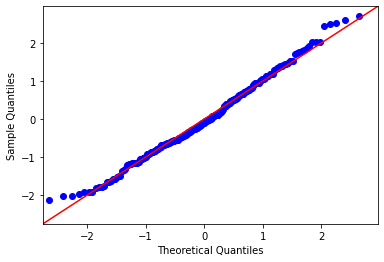

ZSL model :  US_LM1_A  Shapiro-Wilk test pvalue:  0.07366690784692764 ***normally distributed***
----------------------------------------
US_LM1_B


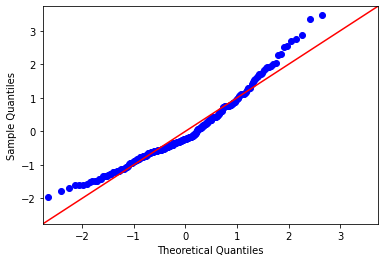

ZSL model :  US_LM1_B  Shapiro-Wilk test pvalue:  3.817640958914126e-07 
----------------------------------------
US_LM1_C


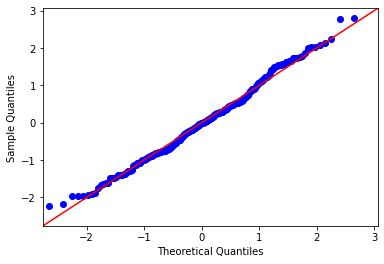

ZSL model :  US_LM1_C  Shapiro-Wilk test pvalue:  0.12164133042097092 ***normally distributed***
----------------------------------------
US_LM1_D


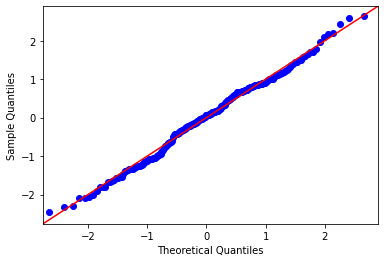

ZSL model :  US_LM1_D  Shapiro-Wilk test pvalue:  0.1617986410856247 ***normally distributed***
----------------------------------------
US_LM1_E


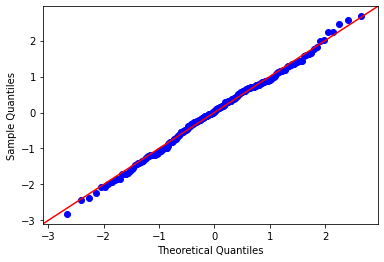

ZSL model :  US_LM1_E  Shapiro-Wilk test pvalue:  0.6404836177825928 ***normally distributed***
----------------------------------------
US_LM2_A


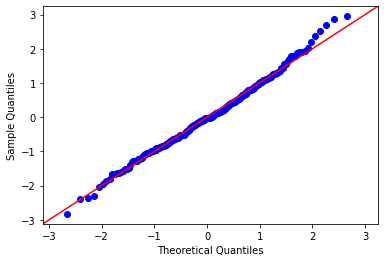

ZSL model :  US_LM2_A  Shapiro-Wilk test pvalue:  0.5361388921737671 ***normally distributed***
----------------------------------------
US_LM2_B


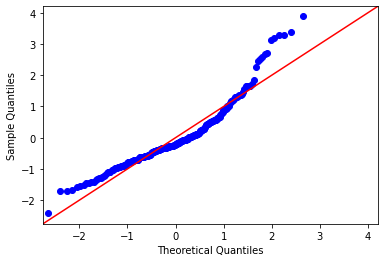

ZSL model :  US_LM2_B  Shapiro-Wilk test pvalue:  1.0583079551595986e-10 
----------------------------------------
US_LM2_C


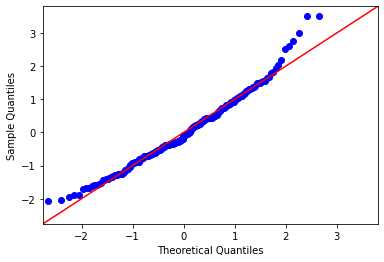

ZSL model :  US_LM2_C  Shapiro-Wilk test pvalue:  0.0007092487649060786 
----------------------------------------
US_LM2_D


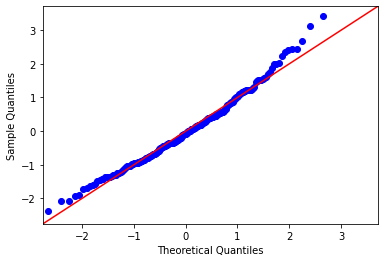

ZSL model :  US_LM2_D  Shapiro-Wilk test pvalue:  0.00611611595377326 
----------------------------------------
US_LM2_E


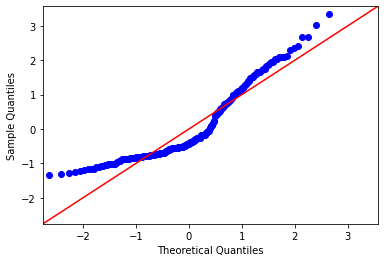

ZSL model :  US_LM2_E  Shapiro-Wilk test pvalue:  2.1679333946523355e-13 
----------------------------------------
US_LM3_A


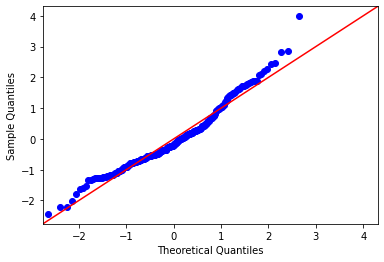

ZSL model :  US_LM3_A  Shapiro-Wilk test pvalue:  7.420756901410641e-06 
----------------------------------------
US_LM3_B


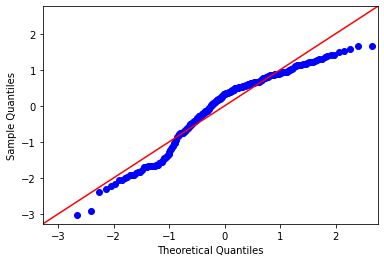

ZSL model :  US_LM3_B  Shapiro-Wilk test pvalue:  2.3905508683697008e-09 
----------------------------------------
US_LM3_C


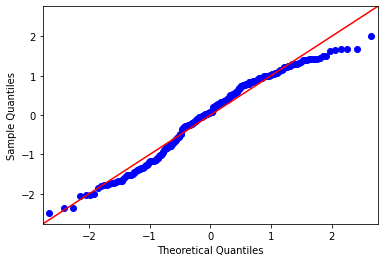

ZSL model :  US_LM3_C  Shapiro-Wilk test pvalue:  1.9293103832751513e-05 
----------------------------------------
US_LM3_D


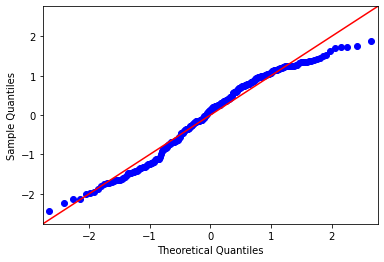

ZSL model :  US_LM3_D  Shapiro-Wilk test pvalue:  1.8915343389380723e-05 
----------------------------------------
US_LM3_E


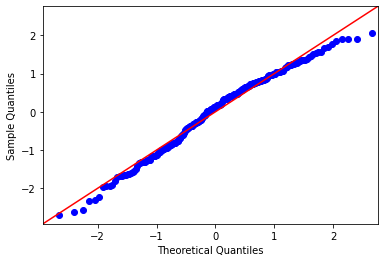

ZSL model :  US_LM3_E  Shapiro-Wilk test pvalue:  0.0019035004079341888 
----------------------------------------
US_LM4_A


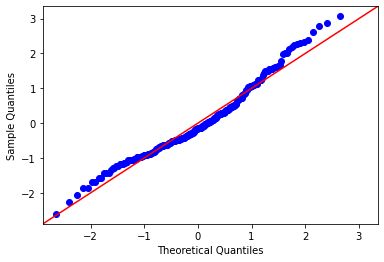

ZSL model :  US_LM4_A  Shapiro-Wilk test pvalue:  4.429887485457584e-05 
----------------------------------------
US_LM4_B


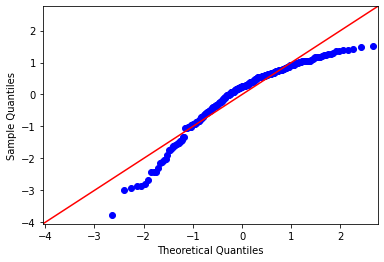

ZSL model :  US_LM4_B  Shapiro-Wilk test pvalue:  1.0680986650690727e-10 
----------------------------------------
US_LM4_C


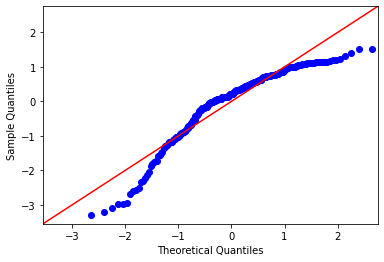

ZSL model :  US_LM4_C  Shapiro-Wilk test pvalue:  4.7153600468696766e-12 
----------------------------------------
US_LM4_D


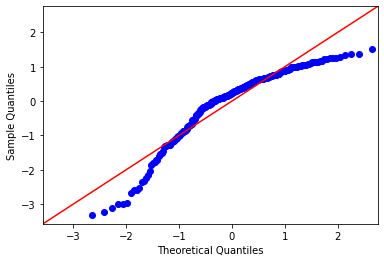

ZSL model :  US_LM4_D  Shapiro-Wilk test pvalue:  3.285582092851791e-12 
----------------------------------------
US_LM4_E


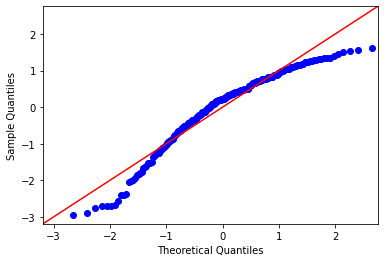

ZSL model :  US_LM4_E  Shapiro-Wilk test pvalue:  3.4934579673517874e-09 
----------------------------------------
SE_LM1_A


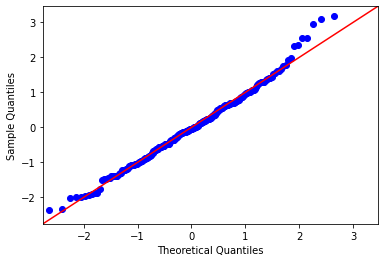

ZSL model :  SE_LM1_A  Shapiro-Wilk test pvalue:  0.07215052098035812 ***normally distributed***
----------------------------------------
SE_LM1_B


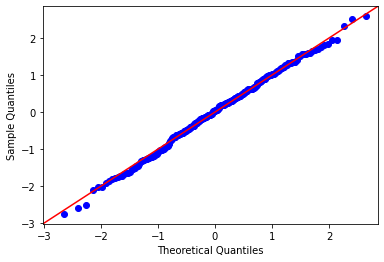

ZSL model :  SE_LM1_B  Shapiro-Wilk test pvalue:  0.8054103851318359 ***normally distributed***
----------------------------------------
SE_LM1_C


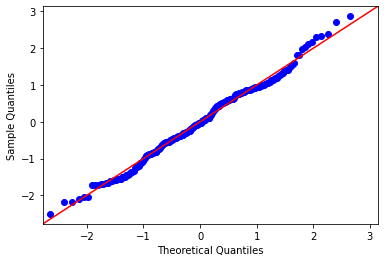

ZSL model :  SE_LM1_C  Shapiro-Wilk test pvalue:  0.16521458327770233 ***normally distributed***
----------------------------------------
SE_LM1_D


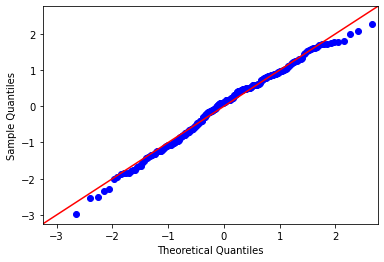

ZSL model :  SE_LM1_D  Shapiro-Wilk test pvalue:  0.04076755419373512 
----------------------------------------
SE_LM1_E


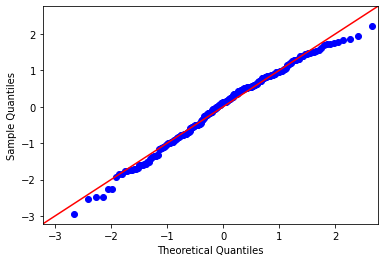

ZSL model :  SE_LM1_E  Shapiro-Wilk test pvalue:  0.019043447449803352 
----------------------------------------
SE_LM2_A


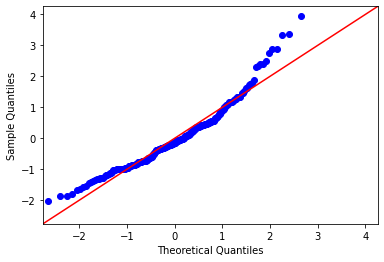

ZSL model :  SE_LM2_A  Shapiro-Wilk test pvalue:  9.45818072750626e-08 
----------------------------------------
SE_LM2_B


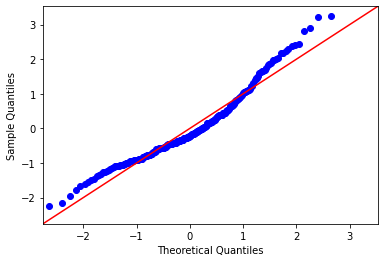

ZSL model :  SE_LM2_B  Shapiro-Wilk test pvalue:  1.924058778968174e-07 
----------------------------------------
SE_LM2_C


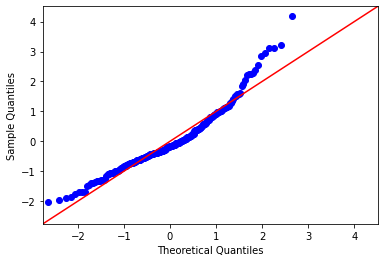

ZSL model :  SE_LM2_C  Shapiro-Wilk test pvalue:  1.6336265673544403e-08 
----------------------------------------
SE_LM2_D


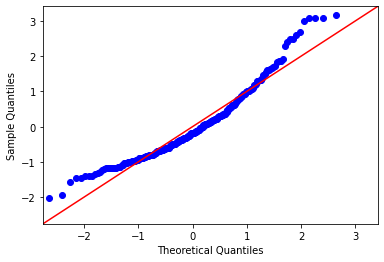

ZSL model :  SE_LM2_D  Shapiro-Wilk test pvalue:  9.43743039272249e-09 
----------------------------------------
SE_LM2_E


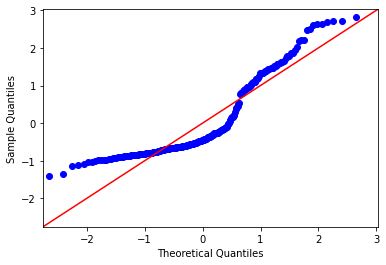

ZSL model :  SE_LM2_E  Shapiro-Wilk test pvalue:  2.2228232472167823e-15 
----------------------------------------
SE_LM3_A


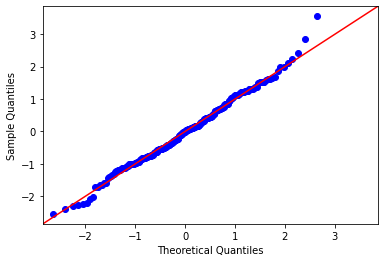

ZSL model :  SE_LM3_A  Shapiro-Wilk test pvalue:  0.30989405512809753 ***normally distributed***
----------------------------------------
SE_LM3_B


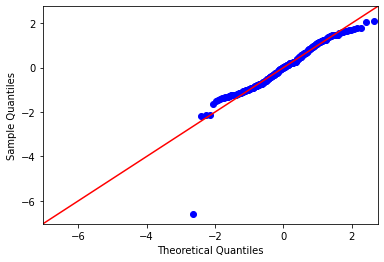

ZSL model :  SE_LM3_B  Shapiro-Wilk test pvalue:  1.849840947087955e-09 
----------------------------------------
SE_LM3_C


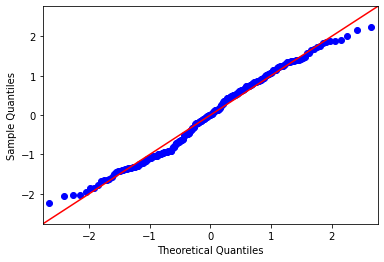

ZSL model :  SE_LM3_C  Shapiro-Wilk test pvalue:  0.003026750637218356 
----------------------------------------
SE_LM3_D


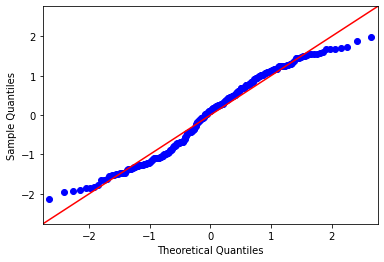

ZSL model :  SE_LM3_D  Shapiro-Wilk test pvalue:  1.2448985216906294e-05 
----------------------------------------
SE_LM3_E


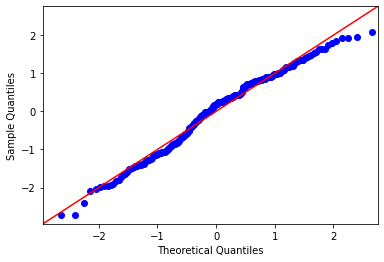

ZSL model :  SE_LM3_E  Shapiro-Wilk test pvalue:  0.0016297671245411038 
----------------------------------------
SE_LM4_A


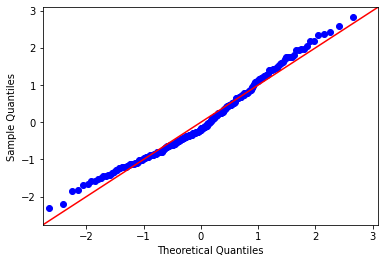

ZSL model :  SE_LM4_A  Shapiro-Wilk test pvalue:  0.0006977913435548544 
----------------------------------------
SE_LM4_B


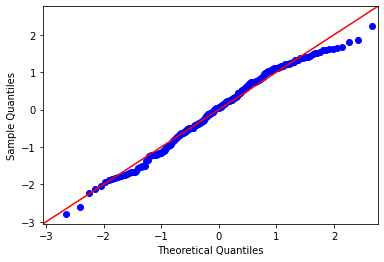

ZSL model :  SE_LM4_B  Shapiro-Wilk test pvalue:  0.003927159588783979 
----------------------------------------
SE_LM4_C


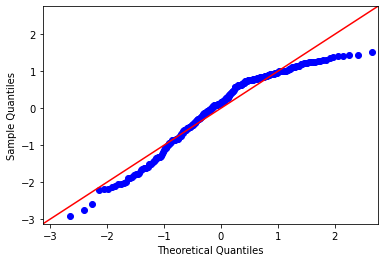

ZSL model :  SE_LM4_C  Shapiro-Wilk test pvalue:  1.1419848178206848e-08 
----------------------------------------
SE_LM4_D


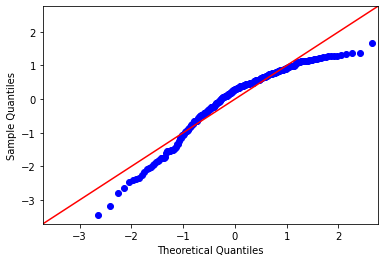

ZSL model :  SE_LM4_D  Shapiro-Wilk test pvalue:  4.638645023646859e-10 
----------------------------------------
SE_LM4_E


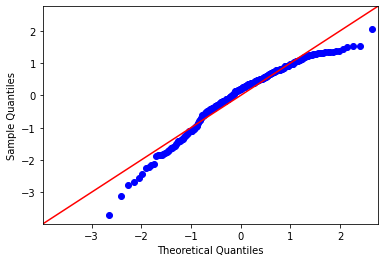

ZSL model :  SE_LM4_E  Shapiro-Wilk test pvalue:  1.7720473977078655e-07 
----------------------------------------
O_LM1_A


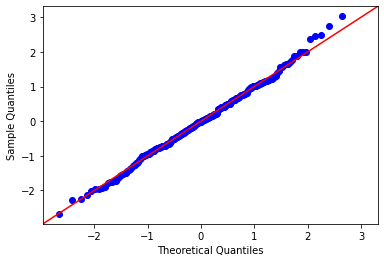

ZSL model :  O_LM1_A  Shapiro-Wilk test pvalue:  0.8815494179725647 ***normally distributed***
----------------------------------------
O_LM1_B


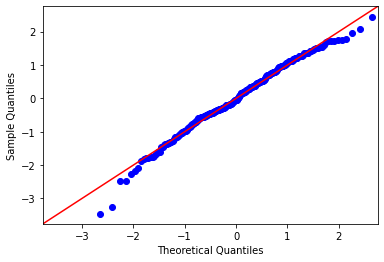

ZSL model :  O_LM1_B  Shapiro-Wilk test pvalue:  0.0556100495159626 ***normally distributed***
----------------------------------------
O_LM1_C


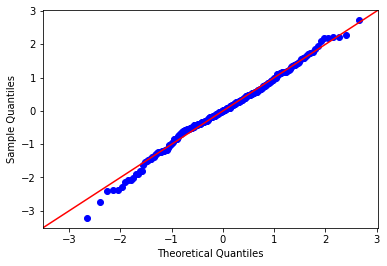

ZSL model :  O_LM1_C  Shapiro-Wilk test pvalue:  0.2922108769416809 ***normally distributed***
----------------------------------------
O_LM1_D


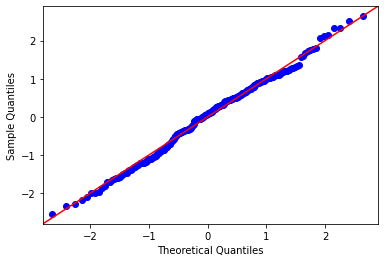

ZSL model :  O_LM1_D  Shapiro-Wilk test pvalue:  0.2403944581747055 ***normally distributed***
----------------------------------------
O_LM1_E


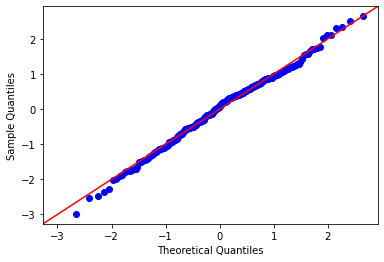

ZSL model :  O_LM1_E  Shapiro-Wilk test pvalue:  0.4685952067375183 ***normally distributed***
----------------------------------------
O_LM2_A


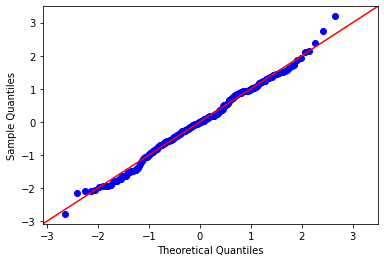

ZSL model :  O_LM2_A  Shapiro-Wilk test pvalue:  0.472863107919693 ***normally distributed***
----------------------------------------
O_LM2_B


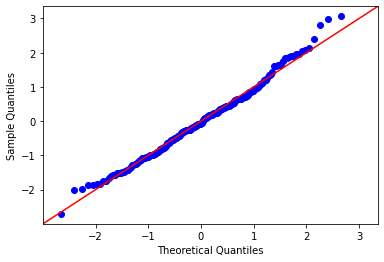

ZSL model :  O_LM2_B  Shapiro-Wilk test pvalue:  0.12936082482337952 ***normally distributed***
----------------------------------------
O_LM2_C


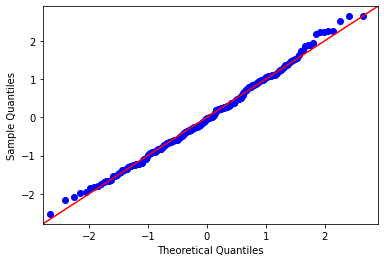

ZSL model :  O_LM2_C  Shapiro-Wilk test pvalue:  0.3639817535877228 ***normally distributed***
----------------------------------------
O_LM2_D


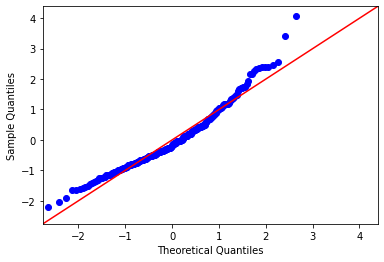

ZSL model :  O_LM2_D  Shapiro-Wilk test pvalue:  1.175330226033111e-06 
----------------------------------------
O_LM2_E


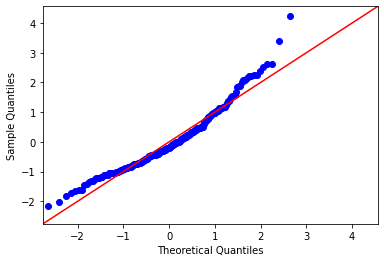

ZSL model :  O_LM2_E  Shapiro-Wilk test pvalue:  2.152649472009216e-07 
----------------------------------------
O_LM3_A


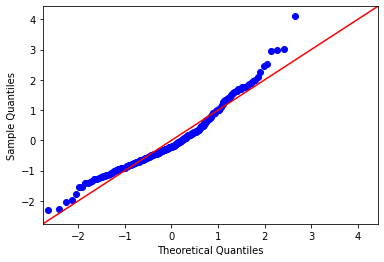

ZSL model :  O_LM3_A  Shapiro-Wilk test pvalue:  3.932212280233216e-07 
----------------------------------------
O_LM3_B


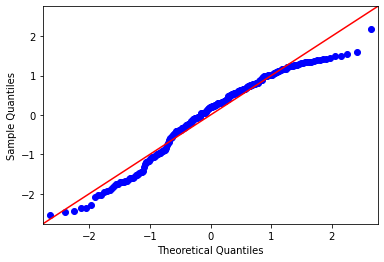

ZSL model :  O_LM3_B  Shapiro-Wilk test pvalue:  1.8546026012700167e-06 
----------------------------------------
O_LM3_C


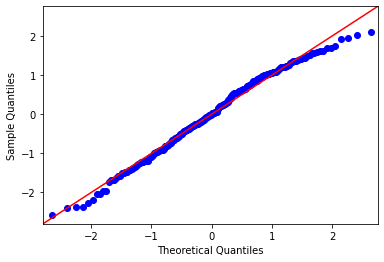

ZSL model :  O_LM3_C  Shapiro-Wilk test pvalue:  0.0188144501298666 
----------------------------------------
O_LM3_D


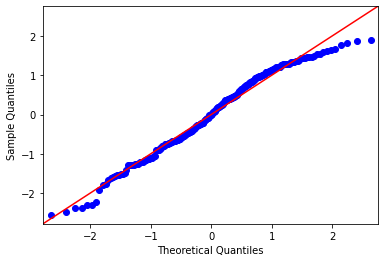

ZSL model :  O_LM3_D  Shapiro-Wilk test pvalue:  0.0008683878113515675 
----------------------------------------
O_LM3_E


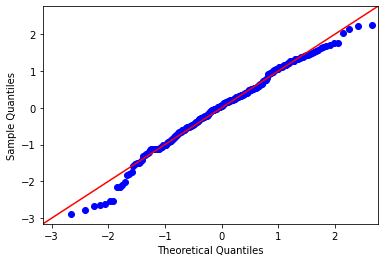

ZSL model :  O_LM3_E  Shapiro-Wilk test pvalue:  0.01112774945795536 
----------------------------------------
O_LM4_A


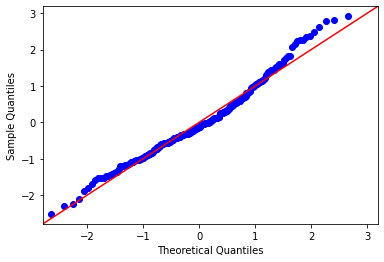

ZSL model :  O_LM4_A  Shapiro-Wilk test pvalue:  0.0006816423265263438 
----------------------------------------
O_LM4_B


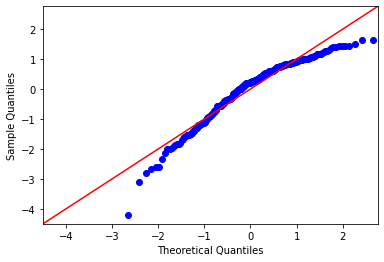

ZSL model :  O_LM4_B  Shapiro-Wilk test pvalue:  6.598090962484093e-09 
----------------------------------------
O_LM4_C


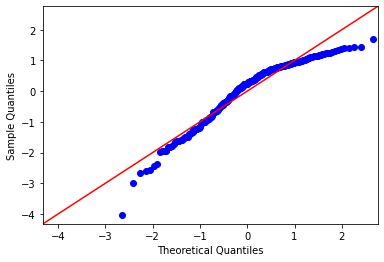

ZSL model :  O_LM4_C  Shapiro-Wilk test pvalue:  2.862923231816694e-09 
----------------------------------------
O_LM4_D


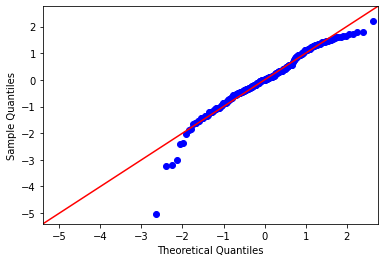

ZSL model :  O_LM4_D  Shapiro-Wilk test pvalue:  1.9474000509944744e-06 
----------------------------------------
O_LM4_E


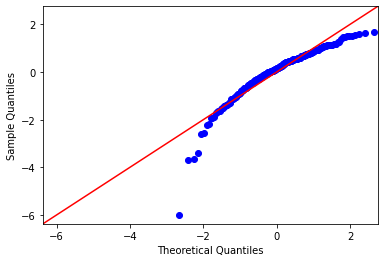

ZSL model :  O_LM4_E  Shapiro-Wilk test pvalue:  7.073028360921052e-12 
----------------------------------------
PE_LM1_A


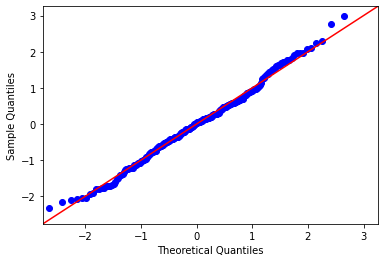

ZSL model :  PE_LM1_A  Shapiro-Wilk test pvalue:  0.30895566940307617 ***normally distributed***
----------------------------------------
PE_LM1_B


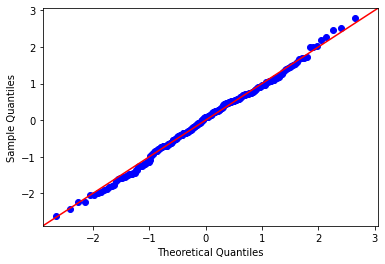

ZSL model :  PE_LM1_B  Shapiro-Wilk test pvalue:  0.5725972652435303 ***normally distributed***
----------------------------------------
PE_LM1_C


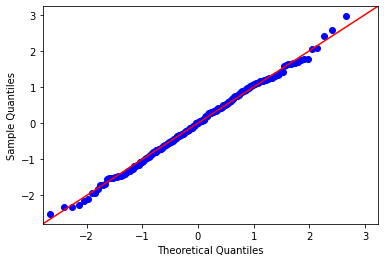

ZSL model :  PE_LM1_C  Shapiro-Wilk test pvalue:  0.8144236207008362 ***normally distributed***
----------------------------------------
PE_LM1_D


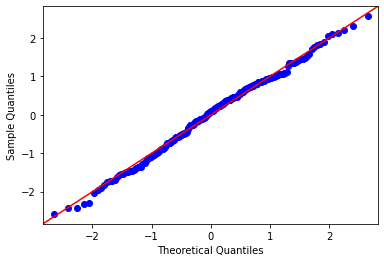

ZSL model :  PE_LM1_D  Shapiro-Wilk test pvalue:  0.27775123715400696 ***normally distributed***
----------------------------------------
PE_LM1_E


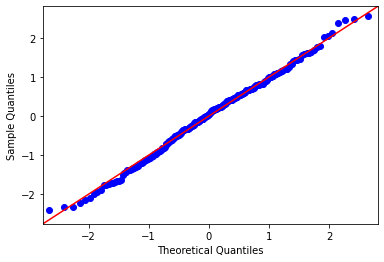

ZSL model :  PE_LM1_E  Shapiro-Wilk test pvalue:  0.4325762987136841 ***normally distributed***
----------------------------------------
PE_LM2_A


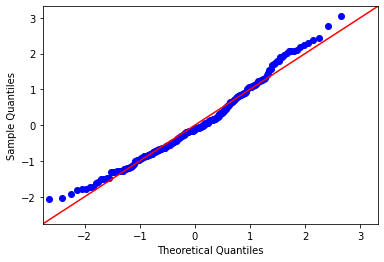

ZSL model :  PE_LM2_A  Shapiro-Wilk test pvalue:  0.0009843128500506282 
----------------------------------------
PE_LM2_B


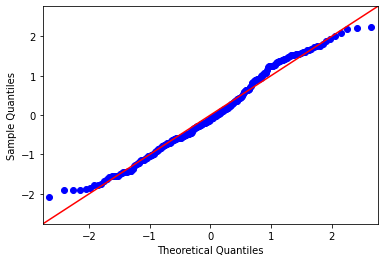

ZSL model :  PE_LM2_B  Shapiro-Wilk test pvalue:  0.001792385708540678 
----------------------------------------
PE_LM2_C


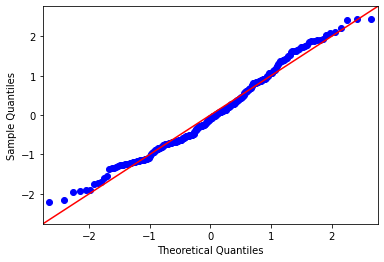

ZSL model :  PE_LM2_C  Shapiro-Wilk test pvalue:  0.0020463711116462946 
----------------------------------------
PE_LM2_D


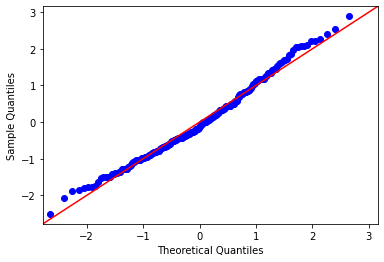

ZSL model :  PE_LM2_D  Shapiro-Wilk test pvalue:  0.020542604848742485 
----------------------------------------
PE_LM2_E


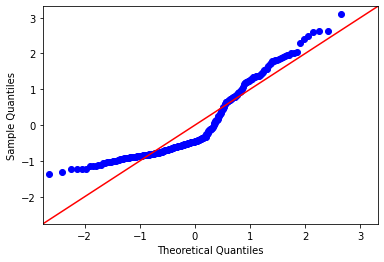

ZSL model :  PE_LM2_E  Shapiro-Wilk test pvalue:  2.9419357032954563e-13 
----------------------------------------
PE_LM3_A


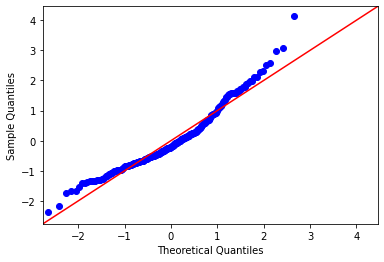

ZSL model :  PE_LM3_A  Shapiro-Wilk test pvalue:  3.498828959891398e-07 
----------------------------------------
PE_LM3_B


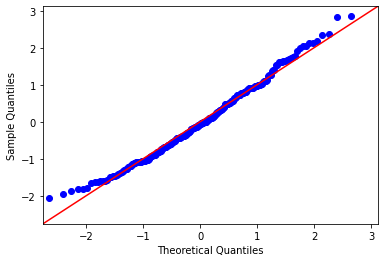

ZSL model :  PE_LM3_B  Shapiro-Wilk test pvalue:  0.01736915111541748 
----------------------------------------
PE_LM3_C


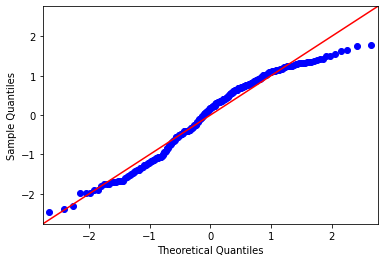

ZSL model :  PE_LM3_C  Shapiro-Wilk test pvalue:  2.599625759103219e-06 
----------------------------------------
PE_LM3_D


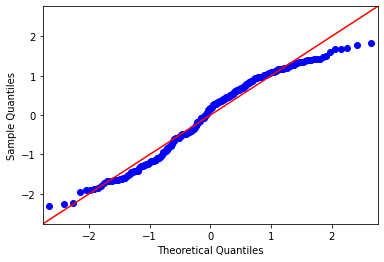

ZSL model :  PE_LM3_D  Shapiro-Wilk test pvalue:  5.234775471762987e-06 
----------------------------------------
PE_LM3_E


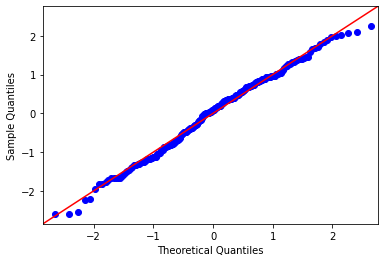

ZSL model :  PE_LM3_E  Shapiro-Wilk test pvalue:  0.07580488920211792 ***normally distributed***
----------------------------------------
PE_LM4_A


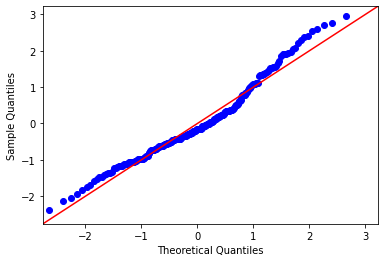

ZSL model :  PE_LM4_A  Shapiro-Wilk test pvalue:  1.5072382666403428e-05 
----------------------------------------
PE_LM4_B


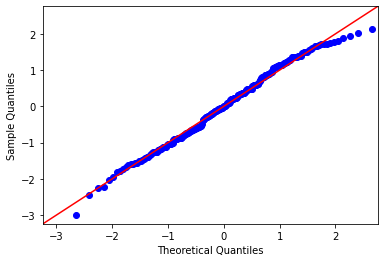

ZSL model :  PE_LM4_B  Shapiro-Wilk test pvalue:  0.08905430883169174 ***normally distributed***
----------------------------------------
PE_LM4_C


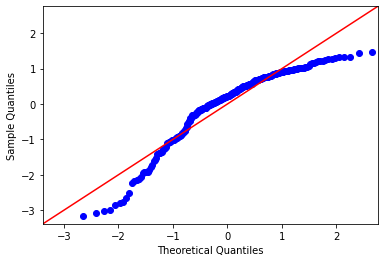

ZSL model :  PE_LM4_C  Shapiro-Wilk test pvalue:  9.50177176523015e-12 
----------------------------------------
PE_LM4_D


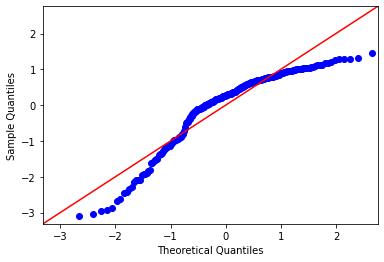

ZSL model :  PE_LM4_D  Shapiro-Wilk test pvalue:  9.603412899975017e-13 
----------------------------------------
PE_LM4_E


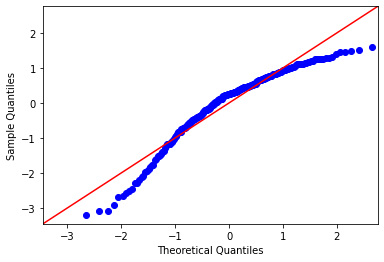

ZSL model :  PE_LM4_E  Shapiro-Wilk test pvalue:  3.587555530426556e-10 
----------------------------------------


In [14]:
for c in cols:
  print(c)
  fig = sm.qqplot(NFRbinary_data[c].fillna(0), fit=True, line='45')
  plt.show()
  pvalue = stats.shapiro(NFRbinary_data[c].fillna(0))[1]
  print('ZSL model : ', c, ' Shapiro-Wilk test pvalue: ',  pvalue, "***normally distributed***" if pvalue >0.05 else "")
  print("----------------------------------------")


## C) Variance Testing

The statistical significance test (also known as “variance analysis”) is used to compare the variance of the means within the ZSL classifiers to assess if the systems have the same effect or not.

For this statistical test, we used *one-way ANOVA* with repeated measures, and verified the results with another nonparametric significance test, the *Friedman Test*.

### Observation:
We ran the variance testing to test the null hypotheses of a) language models' impact; and 2) label configurations. From all the variance testing results, per NFR binary classification **all the ZSL classifiers in NFR binary-class classification are statistically significant** (i.e., we reject $H_{0}$ with a p-value less than 0.05). Therefore, the ZSL performance results are not due to chance.

In [15]:
print("******USability (US) - Stat. Analysis******")
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_A']), np.array(NFRbinary_data['US_LM2_A']), np.array(NFRbinary_data['US_LM3_A']), np.array(NFRbinary_data['US_LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_B']), np.array(NFRbinary_data['US_LM2_B']), np.array(NFRbinary_data['US_LM3_B']), np.array(NFRbinary_data['US_LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_C']), np.array(NFRbinary_data['US_LM2_C']), np.array(NFRbinary_data['US_LM3_C']), np.array(NFRbinary_data['US_LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_D']), np.array(NFRbinary_data['US_LM2_D']), np.array(NFRbinary_data['US_LM3_D']), np.array(NFRbinary_data['US_LM4_D'])))
print("Label-E across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_E']), np.array(NFRbinary_data['US_LM2_E']), np.array(NFRbinary_data['US_LM3_E']), np.array(NFRbinary_data['US_LM4_E'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_A']), np.array(NFRbinary_data['US_LM2_A']), np.array(NFRbinary_data['US_LM3_A']), np.array(NFRbinary_data['US_LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_B']), np.array(NFRbinary_data['US_LM2_B']), np.array(NFRbinary_data['US_LM3_B']), np.array(NFRbinary_data['US_LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_C']), np.array(NFRbinary_data['US_LM2_C']), np.array(NFRbinary_data['US_LM3_C']), np.array(NFRbinary_data['US_LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_D']), np.array(NFRbinary_data['US_LM2_D']), np.array(NFRbinary_data['US_LM3_D']), np.array(NFRbinary_data['US_LM4_D'])))
print("Label-E across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_E']), np.array(NFRbinary_data['US_LM2_E']), np.array(NFRbinary_data['US_LM3_E']), np.array(NFRbinary_data['US_LM4_E'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("US_LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['US_LM1_A']), np.array(NFRbinary_data['US_LM1_B']), np.array(NFRbinary_data['US_LM1_C']),np.array(NFRbinary_data['US_LM1_D']),np.array(NFRbinary_data['US_LM1_E'])))
print("US_LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['US_LM2_A']), np.array(NFRbinary_data['US_LM2_B']), np.array(NFRbinary_data['US_LM2_C']), np.array(NFRbinary_data['US_LM2_D']),np.array(NFRbinary_data['US_LM2_E'])))
print("US_LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['US_LM3_A']), np.array(NFRbinary_data['US_LM3_B']), np.array(NFRbinary_data['US_LM3_C']), np.array(NFRbinary_data['US_LM3_D']),np.array(NFRbinary_data['US_LM3_E'])))
print("US_LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['US_LM4_A']), np.array(NFRbinary_data['US_LM4_B']), np.array(NFRbinary_data['US_LM4_C']), np.array(NFRbinary_data['US_LM4_D']),np.array(NFRbinary_data['US_LM4_E'])))
print("----------------------------------------")
print("US_LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['US_LM1_A']), np.array(NFRbinary_data['US_LM1_B']), np.array(NFRbinary_data['US_LM1_C']), np.array(NFRbinary_data['US_LM1_D']),np.array(NFRbinary_data['US_LM1_E'])))
print("US_LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['US_LM2_A']), np.array(NFRbinary_data['US_LM2_B']), np.array(NFRbinary_data['US_LM2_C']), np.array(NFRbinary_data['US_LM2_D']),np.array(NFRbinary_data['US_LM2_E'])))
print("US_LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['US_LM3_A']), np.array(NFRbinary_data['US_LM3_B']), np.array(NFRbinary_data['US_LM3_C']), np.array(NFRbinary_data['US_LM3_D']),np.array(NFRbinary_data['US_LM3_E'])))
print("US_LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['US_LM4_A']), np.array(NFRbinary_data['US_LM4_B']), np.array(NFRbinary_data['US_LM4_C']), np.array(NFRbinary_data['US_LM4_D']),np.array(NFRbinary_data['US_LM4_E'])))
print("*****************************************")
print()
print()

print("******Security (SE) - Stat. Analysis******")
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_A']), np.array(NFRbinary_data['SE_LM2_A']), np.array(NFRbinary_data['SE_LM3_A']), np.array(NFRbinary_data['SE_LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_B']), np.array(NFRbinary_data['SE_LM2_B']), np.array(NFRbinary_data['SE_LM3_B']), np.array(NFRbinary_data['SE_LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_C']), np.array(NFRbinary_data['SE_LM2_C']), np.array(NFRbinary_data['SE_LM3_C']), np.array(NFRbinary_data['SE_LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_D']), np.array(NFRbinary_data['SE_LM2_D']), np.array(NFRbinary_data['SE_LM3_D']), np.array(NFRbinary_data['SE_LM4_D'])))
print("Label-E across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_E']), np.array(NFRbinary_data['SE_LM2_E']), np.array(NFRbinary_data['SE_LM3_E']), np.array(NFRbinary_data['SE_LM4_E'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_A']), np.array(NFRbinary_data['SE_LM2_A']), np.array(NFRbinary_data['SE_LM3_A']), np.array(NFRbinary_data['SE_LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_B']), np.array(NFRbinary_data['SE_LM2_B']), np.array(NFRbinary_data['SE_LM3_B']), np.array(NFRbinary_data['SE_LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_C']), np.array(NFRbinary_data['SE_LM2_C']), np.array(NFRbinary_data['SE_LM3_C']), np.array(NFRbinary_data['SE_LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_D']), np.array(NFRbinary_data['SE_LM2_D']), np.array(NFRbinary_data['SE_LM3_D']), np.array(NFRbinary_data['SE_LM4_D'])))
print("Label-E across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_E']), np.array(NFRbinary_data['SE_LM2_E']), np.array(NFRbinary_data['SE_LM3_E']), np.array(NFRbinary_data['SE_LM4_E'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("SE_LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['SE_LM1_A']), np.array(NFRbinary_data['SE_LM1_B']), np.array(NFRbinary_data['SE_LM1_C']),np.array(NFRbinary_data['SE_LM1_D']),np.array(NFRbinary_data['SE_LM1_E'])))
print("SE_LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['SE_LM2_A']), np.array(NFRbinary_data['SE_LM2_B']), np.array(NFRbinary_data['SE_LM2_C']), np.array(NFRbinary_data['SE_LM2_D']),np.array(NFRbinary_data['SE_LM2_E'])))
print("SE_LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['SE_LM3_A']), np.array(NFRbinary_data['SE_LM3_B']), np.array(NFRbinary_data['SE_LM3_C']), np.array(NFRbinary_data['SE_LM3_D']),np.array(NFRbinary_data['SE_LM3_E'])))
print("SE_LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['SE_LM4_A']), np.array(NFRbinary_data['SE_LM4_B']), np.array(NFRbinary_data['SE_LM4_C']), np.array(NFRbinary_data['SE_LM4_D']),np.array(NFRbinary_data['SE_LM4_E'])))
print("----------------------------------------")
print("SE_LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM1_A']), np.array(NFRbinary_data['SE_LM1_B']), np.array(NFRbinary_data['SE_LM1_C']), np.array(NFRbinary_data['SE_LM1_D']),np.array(NFRbinary_data['SE_LM1_E'])))
print("SE_LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM2_A']), np.array(NFRbinary_data['SE_LM2_B']), np.array(NFRbinary_data['SE_LM2_C']), np.array(NFRbinary_data['SE_LM2_D']),np.array(NFRbinary_data['SE_LM2_E'])))
print("SE_LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM3_A']), np.array(NFRbinary_data['SE_LM3_B']), np.array(NFRbinary_data['SE_LM3_C']), np.array(NFRbinary_data['SE_LM3_D']),np.array(NFRbinary_data['SE_LM3_E'])))
print("SE_LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['SE_LM4_A']), np.array(NFRbinary_data['SE_LM4_B']), np.array(NFRbinary_data['SE_LM4_C']), np.array(NFRbinary_data['SE_LM4_D']),np.array(NFRbinary_data['SE_LM4_E'])))
print("*****************************************")
print()
print()

print("******Operationl (O) - Stat. Analysis******")
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_A']), np.array(NFRbinary_data['O_LM2_A']), np.array(NFRbinary_data['O_LM3_A']), np.array(NFRbinary_data['O_LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_B']), np.array(NFRbinary_data['O_LM2_B']), np.array(NFRbinary_data['O_LM3_B']), np.array(NFRbinary_data['O_LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_C']), np.array(NFRbinary_data['O_LM2_C']), np.array(NFRbinary_data['O_LM3_C']), np.array(NFRbinary_data['O_LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_D']), np.array(NFRbinary_data['O_LM2_D']), np.array(NFRbinary_data['O_LM3_D']), np.array(NFRbinary_data['O_LM4_D'])))
print("Label-E across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_E']), np.array(NFRbinary_data['O_LM2_E']), np.array(NFRbinary_data['O_LM3_E']), np.array(NFRbinary_data['O_LM4_E'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_A']), np.array(NFRbinary_data['O_LM2_A']), np.array(NFRbinary_data['O_LM3_A']), np.array(NFRbinary_data['O_LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_B']), np.array(NFRbinary_data['O_LM2_B']), np.array(NFRbinary_data['O_LM3_B']), np.array(NFRbinary_data['O_LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_C']), np.array(NFRbinary_data['O_LM2_C']), np.array(NFRbinary_data['O_LM3_C']), np.array(NFRbinary_data['O_LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_D']), np.array(NFRbinary_data['O_LM2_D']), np.array(NFRbinary_data['O_LM3_D']), np.array(NFRbinary_data['O_LM4_D'])))
print("Label-E across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_E']), np.array(NFRbinary_data['O_LM2_E']), np.array(NFRbinary_data['O_LM3_E']), np.array(NFRbinary_data['O_LM4_E'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("O_LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['O_LM1_A']), np.array(NFRbinary_data['O_LM1_B']), np.array(NFRbinary_data['O_LM1_C']),np.array(NFRbinary_data['O_LM1_D']),np.array(NFRbinary_data['O_LM1_E'])))
print("O_LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['O_LM2_A']), np.array(NFRbinary_data['O_LM2_B']), np.array(NFRbinary_data['O_LM2_C']), np.array(NFRbinary_data['O_LM2_D']),np.array(NFRbinary_data['O_LM2_E'])))
print("O_LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['O_LM3_A']), np.array(NFRbinary_data['O_LM3_B']), np.array(NFRbinary_data['O_LM3_C']), np.array(NFRbinary_data['O_LM3_D']),np.array(NFRbinary_data['O_LM3_E'])))
print("O_LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['O_LM4_A']), np.array(NFRbinary_data['O_LM4_B']), np.array(NFRbinary_data['O_LM4_C']), np.array(NFRbinary_data['O_LM4_D']),np.array(NFRbinary_data['O_LM4_E'])))
print("----------------------------------------")
print("O_LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['O_LM1_A']), np.array(NFRbinary_data['O_LM1_B']), np.array(NFRbinary_data['O_LM1_C']), np.array(NFRbinary_data['O_LM1_D']),np.array(NFRbinary_data['O_LM1_E'])))
print("O_LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['O_LM2_A']), np.array(NFRbinary_data['O_LM2_B']), np.array(NFRbinary_data['O_LM2_C']), np.array(NFRbinary_data['O_LM2_D']),np.array(NFRbinary_data['O_LM2_E'])))
print("O_LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['O_LM3_A']), np.array(NFRbinary_data['O_LM3_B']), np.array(NFRbinary_data['O_LM3_C']), np.array(NFRbinary_data['O_LM3_D']),np.array(NFRbinary_data['O_LM3_E'])))
print("O_LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['O_LM4_A']), np.array(NFRbinary_data['O_LM4_B']), np.array(NFRbinary_data['O_LM4_C']), np.array(NFRbinary_data['O_LM4_D']),np.array(NFRbinary_data['O_LM4_E'])))
print("*****************************************")
print()
print()


print("******Performance (PE) - Stat. Analysis******")
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_A']), np.array(NFRbinary_data['PE_LM2_A']), np.array(NFRbinary_data['PE_LM3_A']), np.array(NFRbinary_data['PE_LM4_A'])))
print("Label-B across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_B']), np.array(NFRbinary_data['PE_LM2_B']), np.array(NFRbinary_data['PE_LM3_B']), np.array(NFRbinary_data['PE_LM4_B'])))
print("Label-C across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_C']), np.array(NFRbinary_data['PE_LM2_C']), np.array(NFRbinary_data['PE_LM3_C']), np.array(NFRbinary_data['PE_LM4_C'])))
print("Label-D across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_D']), np.array(NFRbinary_data['PE_LM2_D']), np.array(NFRbinary_data['PE_LM3_D']), np.array(NFRbinary_data['PE_LM4_D'])))
print("Label-E across LMs ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_E']), np.array(NFRbinary_data['PE_LM2_E']), np.array(NFRbinary_data['PE_LM3_E']), np.array(NFRbinary_data['PE_LM4_E'])))
print("----------------------------------------")
print("Label-A across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_A']), np.array(NFRbinary_data['PE_LM2_A']), np.array(NFRbinary_data['PE_LM3_A']), np.array(NFRbinary_data['PE_LM4_A'])))
print("Label-B across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_B']), np.array(NFRbinary_data['PE_LM2_B']), np.array(NFRbinary_data['PE_LM3_B']), np.array(NFRbinary_data['PE_LM4_B'])))
print("Label-C across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_C']), np.array(NFRbinary_data['PE_LM2_C']), np.array(NFRbinary_data['PE_LM3_C']), np.array(NFRbinary_data['PE_LM4_C'])))
print("Label-D across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_D']), np.array(NFRbinary_data['PE_LM2_D']), np.array(NFRbinary_data['PE_LM3_D']), np.array(NFRbinary_data['PE_LM4_D'])))
print("Label-E across LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_E']), np.array(NFRbinary_data['PE_LM2_E']), np.array(NFRbinary_data['PE_LM3_E']), np.array(NFRbinary_data['PE_LM4_E'])))
print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("PE_LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(NFRbinary_data['PE_LM1_A']), np.array(NFRbinary_data['PE_LM1_B']), np.array(NFRbinary_data['PE_LM1_C']),np.array(NFRbinary_data['PE_LM1_D']),np.array(NFRbinary_data['PE_LM1_E'])))
print("PE_LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['PE_LM2_A']), np.array(NFRbinary_data['PE_LM2_B']), np.array(NFRbinary_data['PE_LM2_C']), np.array(NFRbinary_data['PE_LM2_D']),np.array(NFRbinary_data['PE_LM2_E'])))
print("PE_LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['PE_LM3_A']), np.array(NFRbinary_data['PE_LM3_B']), np.array(NFRbinary_data['PE_LM3_C']), np.array(NFRbinary_data['PE_LM3_D']),np.array(NFRbinary_data['PE_LM3_E'])))
print("PE_LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(NFRbinary_data['PE_LM4_A']), np.array(NFRbinary_data['PE_LM4_B']), np.array(NFRbinary_data['PE_LM4_C']), np.array(NFRbinary_data['PE_LM4_D']),np.array(NFRbinary_data['PE_LM4_E'])))
print("----------------------------------------")
print("PE_LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM1_A']), np.array(NFRbinary_data['PE_LM1_B']), np.array(NFRbinary_data['PE_LM1_C']), np.array(NFRbinary_data['PE_LM1_D']),np.array(NFRbinary_data['PE_LM1_E'])))
print("PE_LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM2_A']), np.array(NFRbinary_data['PE_LM2_B']), np.array(NFRbinary_data['PE_LM2_C']), np.array(NFRbinary_data['PE_LM2_D']),np.array(NFRbinary_data['PE_LM2_E'])))
print("PE_LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM3_A']), np.array(NFRbinary_data['PE_LM3_B']), np.array(NFRbinary_data['PE_LM3_C']), np.array(NFRbinary_data['PE_LM3_D']),np.array(NFRbinary_data['PE_LM3_E'])))
print("PE_LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(NFRbinary_data['PE_LM4_A']), np.array(NFRbinary_data['PE_LM4_B']), np.array(NFRbinary_data['PE_LM4_C']), np.array(NFRbinary_data['PE_LM4_D']),np.array(NFRbinary_data['PE_LM4_E'])))
print("*****************************************")
print()
print()



******USability (US) - Stat. Analysis******
Label-A across LMs ANOVA p-value: F_onewayResult(statistic=5227.680721635555, pvalue=0.0)
Label-B across LMs ANOVA p-value: F_onewayResult(statistic=4107.600987053127, pvalue=0.0)
Label-C across LMs ANOVA p-value: F_onewayResult(statistic=4955.406884017042, pvalue=0.0)
Label-D across LMs ANOVA p-value: F_onewayResult(statistic=3286.210588474845, pvalue=0.0)
Label-E across LMs ANOVA p-value: F_onewayResult(statistic=2835.210909022568, pvalue=0.0)
----------------------------------------
Label-A across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=691.1927710843374, pvalue=1.7051532484065842e-149)
Label-B across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=700.6674698795186, pvalue=1.5042036499646465e-151)
Label-C across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=707.7228915662654, pvalue=4.440284285171515e-153)
Label-D across LMs Friedman Test p-value: FriedmanchisquareResult(statistic=699.78554

# Sec Task (binary-class classification): Statistcal Analysis

In [17]:

#The dataset can downloaded from https://github.com/tobhey/NoRBERT  
url='https://drive.google.com/file/d/1k6YYrFAHOVbNGJkiSbJE7DyhozJcrnCc/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
Sec_data = pd.read_csv(dwn_url, delimiter=',')
data_table.DataTable(Sec_data, include_index=False, num_rows_per_page=10)

## A) Results Description 

In [18]:
cols = ['Sec_LM1_A' , 'Sec_LM1_B', 'Sec_LM1_C', 'Sec_LM1_D',
        'Sec_LM2_A' , 'Sec_LM2_B', 'Sec_LM2_C', 'Sec_LM2_D', 
        'Sec_LM3_A' , 'Sec_LM3_B', 'Sec_LM3_C', 'Sec_LM3_D', 
        'Sec_LM4_A' , 'Sec_LM4_B', 'Sec_LM4_C', 'Sec_LM4_D'
        ]
Sec_data.describe()

Unnamed: 0   Sec_LM1_A   Sec_LM2_A   Sec_LM3_A   Sec_LM4_A   Sec_LM1_B  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   254.500000    0.287562    0.168966    0.334508    0.828260    0.391017   
std    147.368586    0.106286    0.085349    0.049216    0.014361    0.105220   
min      0.000000    0.044597   -0.036673    0.212871    0.792740    0.116599   
25%    127.250000    0.219525    0.109615    0.299817    0.818975    0.322220   
50%    254.500000    0.280326    0.155150    0.335870    0.828199    0.392110   
75%    381.750000    0.351721    0.220768    0.364710    0.835645    0.464496   
max    509.000000    0.659529    0.430288    0.517160    0.876190    0.715808   

        Sec_LM2_B   Sec_LM3_B   Sec_LM4_B   Sec_LM1_C   Sec_LM2_C   Sec_LM3_C  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.207341    0.482592    0.886438    0.415179    0.190781    0.643893   
std      0.100507    0.072666    0.019600    0.101555    0.092913    0.094005   
min     -0.028698    0.310449    0.832320    0.118770   -0.017438    0.339087   
25%      0.135504    0.430349    0.873344    0.352359    0.126501    0.589811   
50%      0.189612    0.475459    0.888716    0.413961    0.181819    0.645312   
75%      0.273413    0.525445    0.900402    0.482580    0.248889    0.706071   
max      0.523768    0.695022    0.934510    0.686844    0.493704    0.885644   

        Sec_LM4_C   Sec_LM1_D   Sec_LM2_D   Sec_LM3_D   Sec_LM4_D  
count  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.921052    0.425670    0.146168    0.515470    0.893364  
std      0.016300    0.097532    0.076214    0.130602    0.027969  
min      0.869200    0.172705   -0.023074    0.225301    0.827175  
25%      0.911141    0.368564    0.088504    0.414001    0.872736  
50%      0.922826    0.424731    0.132923    0.504498    0.892762  
75%      0.931272    0.491102    0.193390    0.620219    0.916977  
max      0.964117    0.734195    0.394316    0.866566    0.955565

## B) Normality Testing

For normality testing, we run two test: 


*   **numerical test:** using Shapiro-Wilk test which tests the null hypothesis that the data was drawn from a normal distribution; and 
*   **visual test:** using a quantile-quantile plot (Q-Q plot) of the standardized data against the standard normal distribution to check the alignment of the data distribution against its standard normal distribution

###Observations:
In all the Q-Q plotting, the data values clearly **do not follow the red 45-degree line**, which is an indication that they **do not follow a normal distribution**. To confirm the results, we run Shapiro-Wilk test, we observed all the ZSl models (except 3 ZSL models) have non-normal data distribution. It should be noted that Shapiro-Wilk test is not accurate with data samples of more than 200, in our case the data sample size is 510. Therefore, we statistically concluded that all the ZSL model results came from a non-normal distribution. 

Sec_LM1_A


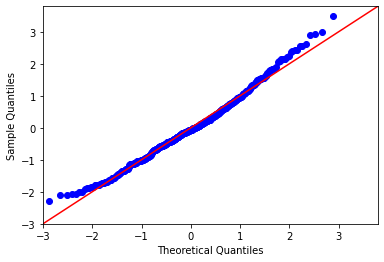

ZSL model :  Sec_LM1_A  Shapiro-Wilk test pvalue:  0.0004086333210580051 
----------------------------------------
Sec_LM1_B


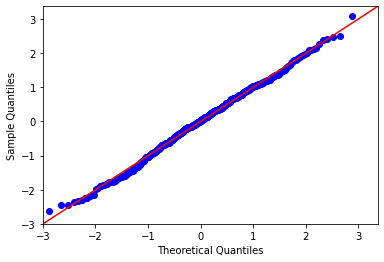

ZSL model :  Sec_LM1_B  Shapiro-Wilk test pvalue:  0.3041500151157379 ***normally distributed***
----------------------------------------
Sec_LM1_C


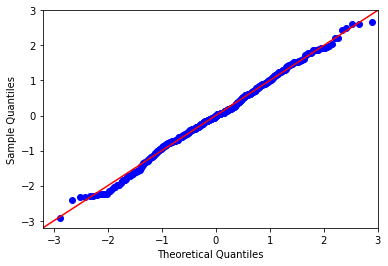

ZSL model :  Sec_LM1_C  Shapiro-Wilk test pvalue:  0.16362304985523224 ***normally distributed***
----------------------------------------
Sec_LM1_D


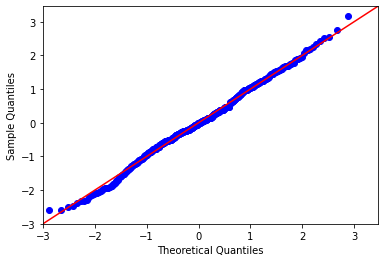

ZSL model :  Sec_LM1_D  Shapiro-Wilk test pvalue:  0.194009929895401 ***normally distributed***
----------------------------------------
Sec_LM2_A


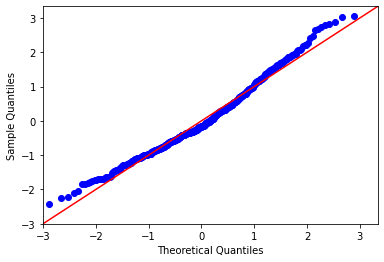

ZSL model :  Sec_LM2_A  Shapiro-Wilk test pvalue:  2.200229573645629e-06 
----------------------------------------
Sec_LM2_B


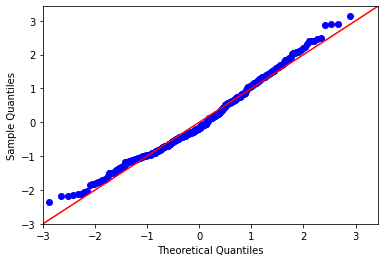

ZSL model :  Sec_LM2_B  Shapiro-Wilk test pvalue:  2.538487569836434e-05 
----------------------------------------
Sec_LM2_C


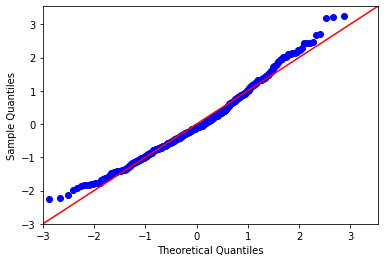

ZSL model :  Sec_LM2_C  Shapiro-Wilk test pvalue:  8.384901775571052e-06 
----------------------------------------
Sec_LM2_D


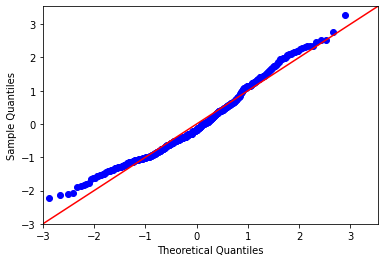

ZSL model :  Sec_LM2_D  Shapiro-Wilk test pvalue:  1.1089144891229807e-07 
----------------------------------------
Sec_LM3_A


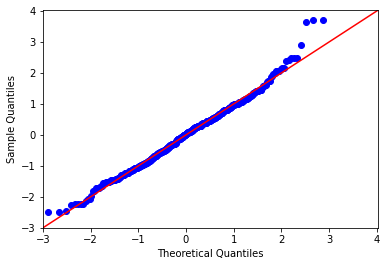

ZSL model :  Sec_LM3_A  Shapiro-Wilk test pvalue:  0.0021546019706875086 
----------------------------------------
Sec_LM3_B


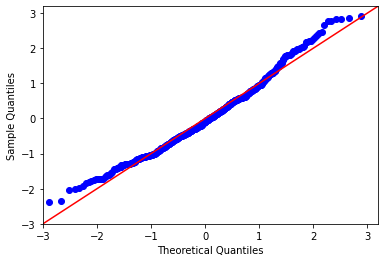

ZSL model :  Sec_LM3_B  Shapiro-Wilk test pvalue:  8.204014193324838e-06 
----------------------------------------
Sec_LM3_C


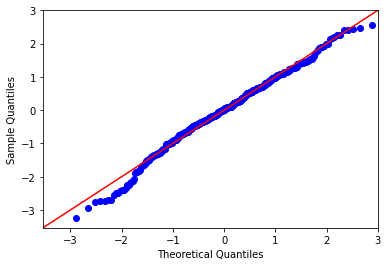

ZSL model :  Sec_LM3_C  Shapiro-Wilk test pvalue:  0.0018151813419535756 
----------------------------------------
Sec_LM3_D


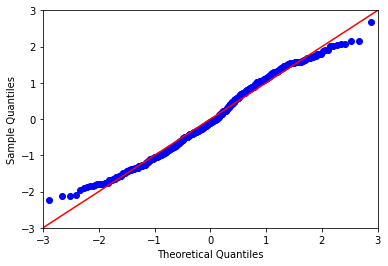

ZSL model :  Sec_LM3_D  Shapiro-Wilk test pvalue:  2.0556153685902245e-05 
----------------------------------------
Sec_LM4_A


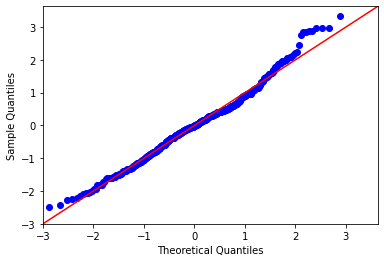

ZSL model :  Sec_LM4_A  Shapiro-Wilk test pvalue:  0.0001986959541682154 
----------------------------------------
Sec_LM4_B


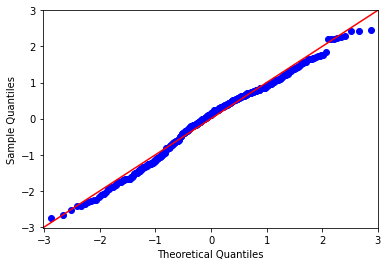

ZSL model :  Sec_LM4_B  Shapiro-Wilk test pvalue:  5.3273684898158535e-05 
----------------------------------------
Sec_LM4_C


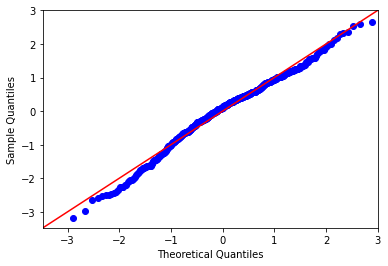

ZSL model :  Sec_LM4_C  Shapiro-Wilk test pvalue:  6.632715667365119e-05 
----------------------------------------
Sec_LM4_D


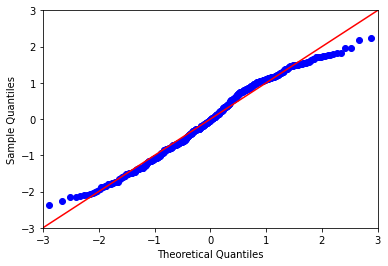

ZSL model :  Sec_LM4_D  Shapiro-Wilk test pvalue:  4.63782089354936e-06 
----------------------------------------


'\nfor (cols, data) in FR_data.iteritems():\n  pvalue = stats.shapiro(data.values)[1]\n  print(\'Column Name : \', cols, \' pvalue: \',  pvalue,\n          "***normally distributed***" if pvalue >0.05 else "")\n'

In [19]:
for c in cols:
  print(c)
  fig = sm.qqplot(Sec_data[c].fillna(0), fit = True,line='45')
  plt.show()
  pvalue = stats.shapiro(Sec_data[c].fillna(0))[1]
  print('ZSL model : ', c, ' Shapiro-Wilk test pvalue: ',  pvalue, "***normally distributed***" if pvalue >0.05 else "")
  print("----------------------------------------")
'''
for (cols, data) in FR_data.iteritems():
  pvalue = stats.shapiro(data.values)[1]
  print('Column Name : ', cols, ' pvalue: ',  pvalue,
          "***normally distributed***" if pvalue >0.05 else "")
'''

## C) Variance Testing

The statistical significance test (also known as “variance analysis”) is used to compare the variance of the means within the ZSL classifiers to assess if the systems have the same effect or not.

For this statistical test, we used *one-way ANOVA* with repeated measures, and verified the results with another nonparametric significance test, the *Friedman Test*.

### Observation:
We ran the variance testing to test the null hypotheses of a) language models' impact; and 2) label configurations. From all the variance testing results, all the ZSL classifiers in FR binary classification are **statistically significant** (i.e., we reject $H_{0}$ with a p-value less than 0.05). Therefore, the ZSL performance results are not due to chance.

In [20]:
### hypothesis testing (a) the impact of language models variation with a specefic label configuartion (the impact of LMs)
print("Label-A across Sec_LMs ANOVA p-value:", stats.f_oneway(np.array(Sec_data['Sec_LM1_A']), np.array(Sec_data['Sec_LM2_A']), np.array(Sec_data['Sec_LM3_A']), np.array(Sec_data['Sec_LM4_A'])))
print("Label-B across Sec_LMs ANOVA p-value:", stats.f_oneway(np.array(Sec_data['Sec_LM1_B']), np.array(Sec_data['Sec_LM2_B']), np.array(Sec_data['Sec_LM3_B']), np.array(Sec_data['Sec_LM4_B'])))
print("Label-C across Sec_LMs ANOVA p-value:", stats.f_oneway(np.array(Sec_data['Sec_LM1_C']), np.array(Sec_data['Sec_LM2_C']), np.array(Sec_data['Sec_LM3_C']), np.array(Sec_data['Sec_LM4_C'])))
print("Label-D across Sec_LMs ANOVA p-value:", stats.f_oneway(np.array(Sec_data['Sec_LM1_D']), np.array(Sec_data['Sec_LM2_D']), np.array(Sec_data['Sec_LM3_D']), np.array(Sec_data['Sec_LM4_D'])))

print("----------------------------------------")
print("Label-A across Sec_LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(Sec_data['Sec_LM1_A']), np.array(Sec_data['Sec_LM2_A']), np.array(Sec_data['Sec_LM3_A']), np.array(Sec_data['Sec_LM4_A'])))
print("Label-B across Sec_LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(Sec_data['Sec_LM1_B']), np.array(Sec_data['Sec_LM2_B']), np.array(Sec_data['Sec_LM3_B']), np.array(Sec_data['Sec_LM4_B'])))
print("Label-C across Sec_LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(Sec_data['Sec_LM1_C']), np.array(Sec_data['Sec_LM2_C']), np.array(Sec_data['Sec_LM3_C']), np.array(Sec_data['Sec_LM4_C'])))
print("Label-D across Sec_LMs Friedman Test p-value:", stats.friedmanchisquare(np.array(Sec_data['Sec_LM1_D']), np.array(Sec_data['Sec_LM2_D']), np.array(Sec_data['Sec_LM3_D']), np.array(Sec_data['Sec_LM4_D'])))

print("----------------------------------------")
print("----------------------------------------")
### hypothesis testing (b) the effect of different label configurations in a specific language model (the impact of label configurations).
print("Sec_LM1 across Labels ANOVA p-value:", stats.f_oneway(np.array(Sec_data['Sec_LM1_A']), np.array(Sec_data['Sec_LM1_B']), np.array(Sec_data['Sec_LM1_C']), np.array(Sec_data['Sec_LM1_D'])))
print("Sec_LM2 across Labels ANOVA p-value:",stats.f_oneway(np.array(Sec_data['Sec_LM2_A']), np.array(Sec_data['Sec_LM2_B']), np.array(Sec_data['Sec_LM2_C']), np.array(Sec_data['Sec_LM2_D'])))
print("Sec_LM3 across Labels ANOVA p-value:",stats.f_oneway(np.array(Sec_data['Sec_LM3_A']), np.array(Sec_data['Sec_LM3_B']), np.array(Sec_data['Sec_LM3_C']), np.array(Sec_data['Sec_LM3_D'])))
print("Sec_LM4 across Labels ANOVA p-value:",stats.f_oneway(np.array(Sec_data['Sec_LM4_A']), np.array(Sec_data['Sec_LM4_B']), np.array(Sec_data['Sec_LM4_C']), np.array(Sec_data['Sec_LM4_D'])))
print("----------------------------------------")
print("Sec_LM1 across Labels Friedman Test p-value:", stats.friedmanchisquare(np.array(Sec_data['Sec_LM1_A']), np.array(Sec_data['Sec_LM1_B']), np.array(Sec_data['Sec_LM1_C']), np.array(Sec_data['Sec_LM1_D'])))
print("Sec_LM2 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(Sec_data['Sec_LM2_A']), np.array(Sec_data['Sec_LM2_B']), np.array(Sec_data['Sec_LM2_C']), np.array(Sec_data['Sec_LM2_D'])))
print("Sec_LM3 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(Sec_data['Sec_LM3_A']), np.array(Sec_data['Sec_LM3_B']), np.array(Sec_data['Sec_LM3_C']), np.array(Sec_data['Sec_LM3_D'])))
print("Sec_LM4 across Labels Friedman Test p-value:",stats.friedmanchisquare(np.array(Sec_data['Sec_LM4_A']), np.array(Sec_data['Sec_LM4_B']), np.array(Sec_data['Sec_LM4_C']), np.array(Sec_data['Sec_LM4_D'])))

Label-A across Sec_LMs ANOVA p-value: F_onewayResult(statistic=8131.35511606923, pvalue=0.0)
Label-B across Sec_LMs ANOVA p-value: F_onewayResult(statistic=6255.8556821292, pvalue=0.0)
Label-C across Sec_LMs ANOVA p-value: F_onewayResult(statistic=7115.3715955264015, pvalue=0.0)
Label-D across Sec_LMs ANOVA p-value: F_onewayResult(statistic=5856.718634389529, pvalue=0.0)
----------------------------------------
Label-A across Sec_LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1310.8870588235295, pvalue=6.390658295586245e-284)
Label-B across Sec_LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1419.9270588235286, pvalue=1.3968038954644281e-307)
Label-C across Sec_LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1503.1082352941175, pvalue=0.0)
Label-D across Sec_LMs Friedman Test p-value: FriedmanchisquareResult(statistic=1400.8517647058816, pvalue=1.924642867577272e-303)
----------------------------------------
--------------------------------------